In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import json

from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

get some basic info of data files

In [9]:
# ValueError: could not convert string to float: '8789-0'
def read_data_partial(given_fname, output_fname, lim=20000):
    content = []
    count = 1

    with open(given_fname, 'r') as fr:
        for line in fr:
            if count <= lim:
                #print(type(line), line)
                content.append(line)
                count += 1
    with open(output_fname, 'w') as fw:
        for line in content:
            # print(type(line), line)
            fw.write(line)
    
    data = pd.read_csv(output_fname, index_col=False)

    return data

In [10]:
qso_train_partial = read_data_partial('quasar_train_catalog.csv', 'qso_train_partial.csv')
print('qso_train_catalog.csv partial data description: ')
qso_train_partial.describe()

qso_train_catalog.csv partial data description: 


ra_d         dec_d             z    u_LSST_mag  u_LSST_magerr  \
count  19999.000000  19999.000000  19999.000000  19999.000000   19999.000000   
mean      23.623792    -22.262561      7.999811     99.164311       0.091043   
std       13.673958     13.470843      1.154848      7.623070       3.252917   
min        0.001002    -47.495711      6.000196     26.765039       0.000000   
25%       11.645229    -33.527219      6.999971     99.990000       0.000000   
50%       23.594917    -21.578934      7.999920     99.990000       0.000000   
75%       35.422686    -10.572103      8.999614     99.990000       0.000000   
max       47.497256     -0.000376      9.999744     99.990000     285.052158   

         g_LSST_mag  g_LSST_magerr    r_LSST_mag  r_LSST_magerr    i_LSST_mag  \
count  19999.000000   19999.000000  19999.000000   19999.000000  19999.000000   
mean      98.638451       0.205693     83.708411       0.652219     56.014640   
std        9.636021       9.258799     30.350312      27.306826     36.410617   
min       27.911082       0.000000     22.470212       0.000000     20.720397   
25%       99.990000       0.000000     99.990000       0.000000     25.028411   
50%       99.990000       0.000000     99.990000       0.000000     29.389093   
75%       99.990000       0.000000     99.990000       0.000000     99.990000   
max       99.990000     878.110221     99.990000    2836.799364     99.990000   

       ...    y_LSST_mag  y_LSST_magerr     Y_WFI_mag  Y_WFI_magerr  \
count  ...  19999.000000   19999.000000  19999.000000  19999.000000   
mean   ...     38.686915       3.220267     22.667320      0.422618   
std    ...     31.606316     187.985892     10.687478     10.845862   
min    ...     17.907592       0.000000     17.958488      0.000000   
25%    ...     18.943982       0.010414     18.566404      0.010093   
50%    ...     25.259249       0.011343     19.349044      0.010231   
75%    ...     28.266166       0.560991     24.374057      0.018531   
max    ...     99.990000   26004.534629     99.990000   1291.885585   

          J_WFI_mag  J_WFI_magerr     H_WFI_mag  H_WFI_magerr     F_WFI_mag  \
count  19999.000000  19999.000000  19999.000000  19999.000000  19999.000000   
mean      18.249912      0.010070     17.991365      0.010060     17.924648   
std        0.144553      0.000095      0.344047      0.000094      0.354783   
min       17.975591      0.009674     16.702080      0.009707     16.475177   
25%       18.124439      0.010005     17.823141      0.009996     17.735487   
50%       18.251091      0.010069     18.066165      0.010060     17.993070   
75%       18.374454      0.010133     18.243405      0.010124     18.180132   
max       18.525293      0.010423     18.651787      0.010430     18.738388   

       F_WFI_magerr  
count  19999.000000  
mean       0.010103  
std        0.000099  
min        0.009701  
25%        0.010036  
50%        0.010102  
75%        0.010169  
max        0.010521  

[8 rows x 23 columns]

In [11]:
# brown dwarf contaminants
mlt_train_partial = read_data_partial('mlt_train_catalog.csv', 'mlt_train_partial.csv')
print('mlt_train_catalog.csv partial data description: ')
mlt_train_partial.describe()

mlt_train_catalog.csv partial data description: 


ra_d         dec_d           spt    u_LSST_mag  u_LSST_magerr  \
count  19999.000000  19999.000000  19999.000000  1.999900e+04        19999.0   
mean      23.604072    -22.261228      4.936797  9.999000e+01            0.0   
std       13.705803     13.505142      0.251022  8.540937e-12            0.0   
min        0.001930    -47.499684      3.000000  9.999000e+01            0.0   
25%       11.705409    -33.465227      5.000000  9.999000e+01            0.0   
50%       23.631542    -21.691304      5.000000  9.999000e+01            0.0   
75%       35.444491    -10.547422      5.000000  9.999000e+01            0.0   
max       47.487130     -0.000214      5.000000  9.999000e+01            0.0   

         g_LSST_mag  g_LSST_magerr    r_LSST_mag  r_LSST_magerr    i_LSST_mag  \
count  1.999900e+04        19999.0  19999.000000   19999.000000  19999.000000   
mean   9.999000e+01            0.0     24.416302       0.020199     19.872187   
std    8.540937e-12            0.0      0.182280       0.001938      0.142525   
min    9.999000e+01            0.0     23.472924       0.013136     19.108723   
25%    9.999000e+01            0.0     24.334772       0.018985     19.777932   
50%    9.999000e+01            0.0     24.433813       0.020168     19.871827   
75%    9.999000e+01            0.0     24.530030       0.021422     19.966675   
max    9.999000e+01            0.0     25.108104       0.028811     20.899200   

       ...    y_LSST_mag  y_LSST_magerr     Y_WFI_mag  Y_WFI_magerr  \
count  ...  19999.000000   19999.000000  19999.000000  19999.000000   
mean   ...     18.550723       0.010603     18.398234      0.010083   
std    ...      0.140613       0.000146      0.141465      0.000094   
min    ...     18.098625       0.010041     17.893173      0.009737   
25%    ...     18.454311       0.010503     18.301993      0.010020   
50%    ...     18.547176       0.010598     18.393954      0.010082   
75%    ...     18.643236       0.010697     18.487967      0.010146   
max    ...     19.597340       0.011930     19.603275      0.010474   

          J_WFI_mag  J_WFI_magerr     H_WFI_mag  H_WFI_magerr     F_WFI_mag  \
count  19999.000000  19999.000000  19999.000000  19999.000000  19999.000000   
mean      18.146058      0.010062     18.037319      0.010061     18.142713   
std        0.143001      0.000094      0.144039      0.000095      0.141402   
min       17.674221      0.009702     17.560797      0.009668     17.670703   
25%       18.049020      0.009998     17.939912      0.009996     18.046667   
50%       18.140592      0.010061     18.031482      0.010060     18.136810   
75%       18.235301      0.010125     18.127651      0.010124     18.234207   
max       19.237794      0.010491     19.127854      0.010468     19.231066   

       F_WFI_magerr  
count  19999.000000  
mean       0.010119  
std        0.000096  
min        0.009760  
25%        0.010054  
50%        0.010118  
75%        0.010184  
max        0.010537  

[8 rows x 23 columns]

In [5]:
galaxies_patch8789_partial = read_data_partial('galaxies_train_catalog_patch8789.csv', 'galaxies_patch8789_partial.csv')
print('galaxies_train_catalog_patch8789.csv partial data description: ')
galaxies_patch8789_partial.describe()

galaxies_train_catalog_patch8789.csv partial data description: 


ra_d         dec_d             z    redsq_flag    u_LSST_mag  \
count  19999.000000  19999.000000  19999.000000  19999.000000  19999.000000   
mean      23.878705    -22.182163      1.029736      0.206060     32.096210   
std       13.681795     13.538485      0.013707      0.404484     19.985380   
min        0.000400    -47.490719      1.005989      0.000000     20.885667   
25%       12.078150    -33.422642      1.018022      0.000000     25.268505   
50%       23.957857    -21.268991      1.030270      0.000000     26.503441   
75%       35.765324    -10.507017      1.040617      0.000000     27.615922   
max       47.499362     -0.001712      1.055213      1.000000     99.990000   

       u_LSST_magerr    g_LSST_mag  g_LSST_magerr    r_LSST_mag  \
count   19999.000000  19999.000000   19999.000000  19999.000000   
mean        0.841619     27.163475       0.365798     25.867251   
std         8.052372      7.995741      11.988124      2.446110   
min         0.000000     21.017643       0.000000     21.061000   
25%         0.060758     25.333199       0.036689     24.983450   
50%         0.193694     26.418137       0.082988     25.941315   
75%         0.475728     27.355587       0.181539     26.707190   
max       610.729321     99.990000    1616.793763     99.990000   

       r_LSST_magerr  ...    z_LSST_mag  z_LSST_magerr     Y_WFI_mag  \
count   19999.000000  ...  19999.000000   19999.000000  19999.000000   
mean        0.086984  ...     24.665585       0.103122     24.393170   
std         0.273719  ...      2.360016       0.326791      1.390669   
min         0.000000  ...     20.251427       0.000000     19.714550   
25%         0.026726  ...     23.871939       0.034156     23.650510   
50%         0.050624  ...     24.740292       0.063615     24.545892   
75%         0.092916  ...     25.467804       0.115342     25.283910   
max        27.122388  ...     99.990000      24.843754     99.990000   

       Y_WFI_magerr     J_WFI_mag  J_WFI_magerr     H_WFI_mag  H_WFI_magerr  \
count  19999.000000  19999.000000  19999.000000  19999.000000  19999.000000   
mean       0.047201     24.257111      0.041552     24.143105      0.041009   
std        0.077989      1.525714      0.041961      1.372470      0.040619   
min        0.000000     19.313884      0.000000     18.971237      0.010012   
25%        0.020292     23.493042      0.018506     23.372548      0.017841   
50%        0.033595     24.424274      0.030043     24.329182      0.029424   
75%        0.056736     25.188414      0.050689     25.119557      0.050084   
max        8.171002     99.990000      1.879305     28.627669      1.148440   

          F_WFI_mag  F_WFI_magerr  
count  19999.000000  19999.000000  
mean      24.097952      0.068160  
std        1.855994      0.311219  
min       18.749711      0.000000  
25%       23.296980      0.023390  
50%       24.277466      0.043752  
75%       25.074150      0.080108  
max       99.990000     40.846061  

[8 rows x 22 columns]

In [6]:
galaxies_patch8786_partial = read_data_partial('galaxies_train_catalog_patch8786.csv', 'galaxies_patch8786_partial.csv')
print('galaxies_train_catalog_patch8786.csv partial data description: ')
galaxies_patch8786_partial.describe()

galaxies_train_catalog_patch8786.csv partial data description: 


ra_d         dec_d             z    redsq_flag    u_LSST_mag  \
count  19999.000000  19999.000000  19999.000000  19999.000000  19999.000000   
mean      23.861391    -22.220777      1.033303      0.207710     32.076440   
std       13.730388     13.446906      0.013441      0.405678     19.986324   
min        0.000071    -47.499394      1.005990      0.000000     20.511595   
25%       11.862930    -33.452881      1.023309      0.000000     25.265173   
50%       23.977822    -21.484245      1.033333      0.000000     26.509003   
75%       35.794271    -10.561793      1.045235      0.000000     27.604059   
max       47.496472     -0.001413      1.055212      1.000000     99.990000   

       u_LSST_magerr    g_LSST_mag  g_LSST_magerr    r_LSST_mag  \
count   19999.000000  19999.000000   19999.000000  19999.000000   
mean        0.902327     27.211979       0.380718     25.851356   
std         8.611686      8.326998      11.659733      2.517689   
min         0.000000     20.689145       0.000000     20.749999   
25%         0.057836     25.334869       0.036408     24.961529   
50%         0.197169     26.402710       0.082021     25.929260   
75%         0.477124     27.339770       0.178356     26.703131   
max       605.642904     99.990000    1492.010952     99.990000   

       r_LSST_magerr  ...    y_LSST_mag  y_LSST_magerr     Y_WFI_mag  \
count   19999.000000  ...  19999.000000   19999.000000  19999.000000   
mean        0.088822  ...     25.221141       0.399308     24.361144   
std         0.307329  ...      7.801614       7.439558      1.312732   
min         0.000000  ...     19.776906       0.000000     19.571055   
25%         0.026510  ...     23.664300       0.072782     23.602897   
50%         0.050329  ...     24.574696       0.157360     24.531609   
75%         0.092701  ...     25.323580       0.305534     25.281628   
max        30.285473  ...     99.990000     979.763106     29.062647   

       Y_WFI_magerr     J_WFI_mag  J_WFI_magerr     H_WFI_mag  H_WFI_magerr  \
count  19999.000000  19999.000000  19999.000000  19999.000000  19999.000000   
mean       0.046372     24.219740      0.041185     24.111885      0.040571   
std        0.045483      1.353944      0.037782      1.402496      0.038762   
min        0.010152     19.165246      0.010151     18.841577      0.010053   
25%        0.019855     23.443356      0.018111     23.313647      0.017441   
50%        0.033312     24.416682      0.029878     24.321447      0.029093   
75%        0.056255     25.179444      0.050102     25.107016      0.049410   
max        1.628481     28.248498      0.767126     28.574002      1.177792   

          F_WFI_mag  F_WFI_magerr  
count  19999.000000  19999.000000  
mean      24.051143      0.065607  
std        1.544440      0.090881  
min       18.619593      0.000000  
25%       23.232343      0.022583  
50%       24.272070      0.043334  
75%       25.066376      0.079415  
max       99.990000      5.245063  

[8 rows x 24 columns]

## drop u and g bands

In [7]:
qso_train_drop = qso_train_partial.copy(deep=True)
mlt_train_drop = mlt_train_partial.copy(deep=True)
galaxies_patch8789_drop = galaxies_patch8789_partial.copy(deep=True)
galaxies_patch8786_drop = galaxies_patch8786_partial.copy(deep=True)

# drop y bands due to varying band depth
qso_train_drop = qso_train_drop[['r_LSST_mag', 'i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag']]
mlt_train_drop = mlt_train_drop[['r_LSST_mag', 'i_LSST_mag', 'z_LSST_mag','Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag']]
galaxies_patch8789_drop = galaxies_patch8789_drop[['r_LSST_mag', 'i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag']]
galaxies_patch8786_drop = galaxies_patch8786_drop[['r_LSST_mag', 'i_LSST_mag', 'z_LSST_mag','Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag']]

In [8]:
print(mlt_train_drop.head())

   r_LSST_mag  i_LSST_mag  z_LSST_mag  Y_WFI_mag  J_WFI_mag  H_WFI_mag  \
0   23.771728   19.188742   18.619318  18.234199  18.173076  18.075345   
1   24.057291   19.349954   18.518527  18.288840  18.190218  17.931068   
2   23.800163   19.231461   18.658050  18.124577  18.069681  18.094448   
3   23.875277   19.292420   18.613907  18.302484  18.055089  17.946084   
4   23.916246   19.295319   18.665239  18.207935  18.128765  18.094981   

   F_WFI_mag  
0  18.112094  
1  18.153265  
2  17.930868  
3  17.947154  
4  18.246019  


### drop missing values

In [9]:
qso_train_drop = qso_train_drop.replace(99.99, np.nan).dropna()
mlt_train_drop = mlt_train_drop.replace(99.99, np.nan).dropna()
galaxies_patch8789_drop = galaxies_patch8789_drop.replace(99.99, np.nan).dropna()
galaxies_patch8786_drop = galaxies_patch8786_drop.replace(99.99, np.nan).dropna()

print(qso_train_drop.head(), len(qso_train_drop))
print(np.where(np.isnan(qso_train_drop)))
print(len(mlt_train_drop))
print(np.where(np.isnan(mlt_train_drop)))
print(len(galaxies_patch8789_drop))
print(np.where(np.isnan(galaxies_patch8789_drop)))
print(len(galaxies_patch8786_drop))
print(np.where(np.isnan(galaxies_patch8786_drop)))

   r_LSST_mag  i_LSST_mag  z_LSST_mag  Y_WFI_mag  J_WFI_mag  H_WFI_mag  \
0   23.264536   21.124055   18.554360  18.128561  18.023118  17.887595   
1   22.749456   20.809598   18.341480  18.051626  18.089177  18.128696   
2   23.423308   21.433489   18.603074  18.187806  18.020838  17.793332   
3   23.340448   21.204065   18.452523  18.136504  18.066659  17.968268   
4   23.158449   20.894110   18.271392  18.043841  18.061578  18.047223   

   F_WFI_mag  
0  17.631285  
1  18.004063  
2  17.472947  
3  17.731981  
4  17.902222   4402
(array([], dtype=int64), array([], dtype=int64))
19999
(array([], dtype=int64), array([], dtype=int64))
19958
(array([], dtype=int64), array([], dtype=int64))
19961
(array([], dtype=int64), array([], dtype=int64))


In [10]:
qso_train_drop['label'] = np.ones(len(qso_train_drop))
mlt_train_drop['label'] = np.zeros(len(mlt_train_drop))
galaxies_patch8789_drop['label'] = np.zeros(len(galaxies_patch8789_drop))
galaxies_patch8786_drop['label'] = np.zeros(len(galaxies_patch8786_drop))

### check the cleaned datasets and concatenate into new ones

In [11]:
print('qso:\n', qso_train_drop.head())
print('bd:\n', mlt_train_drop.head())
print('galaxies patch8789:\n', galaxies_patch8789_drop.head())
print('galaxies path8786:\n', galaxies_patch8786_drop.head())

qso:
    r_LSST_mag  i_LSST_mag  z_LSST_mag  Y_WFI_mag  J_WFI_mag  H_WFI_mag  \
0   23.264536   21.124055   18.554360  18.128561  18.023118  17.887595   
1   22.749456   20.809598   18.341480  18.051626  18.089177  18.128696   
2   23.423308   21.433489   18.603074  18.187806  18.020838  17.793332   
3   23.340448   21.204065   18.452523  18.136504  18.066659  17.968268   
4   23.158449   20.894110   18.271392  18.043841  18.061578  18.047223   

   F_WFI_mag  label  
0  17.631285    1.0  
1  18.004063    1.0  
2  17.472947    1.0  
3  17.731981    1.0  
4  17.902222    1.0  
bd:
    r_LSST_mag  i_LSST_mag  z_LSST_mag  Y_WFI_mag  J_WFI_mag  H_WFI_mag  \
0   23.771728   19.188742   18.619318  18.234199  18.173076  18.075345   
1   24.057291   19.349954   18.518527  18.288840  18.190218  17.931068   
2   23.800163   19.231461   18.658050  18.124577  18.069681  18.094448   
3   23.875277   19.292420   18.613907  18.302484  18.055089  17.946084   
4   23.916246   19.295319   18.665239  18.

In [12]:
# data concatenation to get training data
contaminants_drop = pd.concat([mlt_train_drop, galaxies_patch8789_drop, galaxies_patch8786_drop], ignore_index=True)
data_train_drop = pd.concat([qso_train_drop, contaminants_drop], ignore_index=True) # make sure that the data line up
X_drop = data_train_drop[['r_LSST_mag', 'i_LSST_mag', 'z_LSST_mag','Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag']]
Y_drop = data_train_drop['label']

In [13]:
print(len(X_drop))

64320


In [14]:
X_drop.describe()

r_LSST_mag    i_LSST_mag    z_LSST_mag     Y_WFI_mag     J_WFI_mag  \
count  64320.000000  64320.000000  64320.000000  64320.000000  64320.000000   
mean      25.462827     23.381745     22.597101     22.104863     21.928436   
std        1.498309      2.674592      2.824561      3.073334      3.126510   
min       20.749999     19.108723     18.073481     17.893173     17.674221   
25%       24.412208     19.991989     19.107842     18.454022     18.217114   
50%       25.076985     24.256197     23.606381     23.312729     23.127850   
75%       26.409053     25.640148     25.004998     24.817890     24.706659   
max       37.997592     33.782180     32.209823     29.263699     29.527499   

          H_WFI_mag     F_WFI_mag  
count  64320.000000  64320.000000  
mean      21.825399     21.808399  
std        3.134697      3.091399  
min       17.184999     17.143052  
25%       18.119852     18.188870  
50%       22.983096     22.891462  
75%       24.626714     24.577408  
max       28.627669     31.803707

### check some influential combinations of color indices - linear svc

22 < i < 24.5

In [15]:
X_drop_245 = X_drop[X_drop['i_LSST_mag'] < 24.5]
X_drop_245 = X_drop_245[X_drop_245['i_LSST_mag'] > 22.0]
Y_drop_245 = data_train_drop[data_train_drop['i_LSST_mag'] < 24.5]
Y_drop_245 = Y_drop_245[Y_drop_245['i_LSST_mag'] > 22.0]['label']
col_names = ['r_LSST_mag', 'i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag']
for i in range(len(col_names)):
    for j in range(len(col_names)):
        if i < j:
            col = col_names[i] + '-' + col_names[j]
            X_drop_245[col] = X_drop_245[col_names[i]] - X_drop_245[col_names[j]]

X_drop_245_copy = X_drop_245.drop(columns=['r_LSST_mag', 'i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag'])

/data0/sw/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


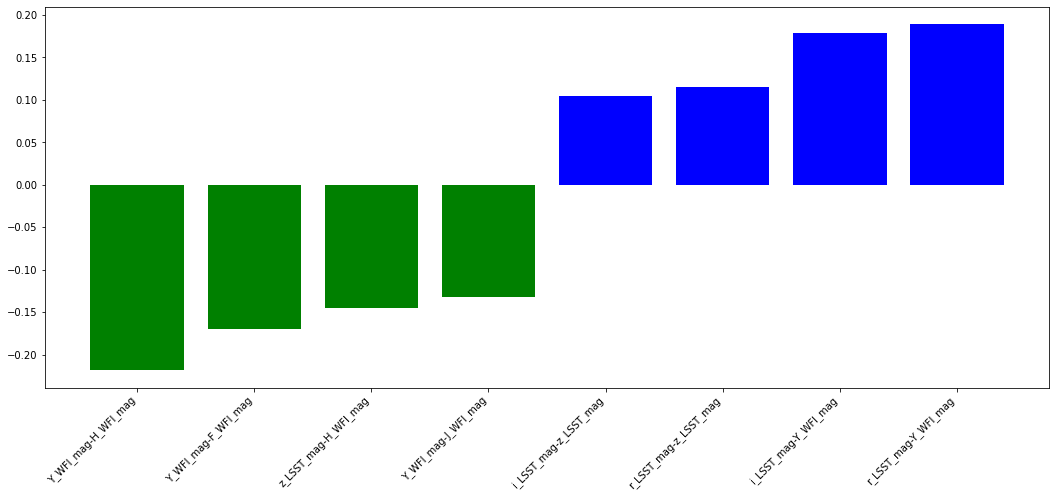

In [16]:
trainedsvm = svm.LinearSVC(max_iter = 2000).fit(X_drop_245_copy, Y_drop_245)
coef = trainedsvm.coef_.ravel()

top_positive_coefficients = np.argsort(coef)[-4:]
top_negative_coefficients = np.argsort(coef)[:4]
top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
plt.figure(figsize=(18, 7))
colors = ['green' if c < 0 else 'blue' for c in coef[top_coefficients]]
plt.bar(np.arange(2 * 4), coef[top_coefficients], color=colors)
feature_names = np.array(X_drop_245_copy.columns)
plt.xticks(np.arange(2 * 4), feature_names[top_coefficients], rotation=45, ha='right')
plt.show()

In [17]:
# keep the columns with the highest influences & check if the dataframes look reasonable
# with i-band limits
X_drop_245 = X_drop_245[['r_LSST_mag', 'i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag', 'Y_WFI_mag-H_WFI_mag', 'Y_WFI_mag-F_WFI_mag','z_LSST_mag-H_WFI_mag', 'Y_WFI_mag-J_WFI_mag', 'i_LSST_mag-z_LSST_mag', 'r_LSST_mag-z_LSST_mag', 'i_LSST_mag-Y_WFI_mag', 'r_LSST_mag-Y_WFI_mag']]

print(type(X_drop_245))
print('X with 22.0 < i < 24.5: \n', X_drop_245.head())

<class 'pandas.core.frame.DataFrame'>
X with 22.0 < i < 24.5: 
      r_LSST_mag  i_LSST_mag  z_LSST_mag  Y_WFI_mag  J_WFI_mag  H_WFI_mag  \
250   24.742821   22.094462   18.874546  18.141918  18.092987  18.074826   
304   25.848806   22.030592   19.422444  18.264333  18.076935  17.984105   
306   25.643431   22.038840   19.404501  18.273683  18.043071  17.844302   
310   25.614387   22.020449   19.134073  18.132919  17.997342  17.920215   
313   25.498590   22.068718   19.220210  18.246276  18.091573  17.966831   

     F_WFI_mag  Y_WFI_mag-H_WFI_mag  Y_WFI_mag-F_WFI_mag  \
250  17.924192             0.067092             0.217726   
304  17.798655             0.280228             0.465679   
306  17.566675             0.429381             0.707008   
310  17.727046             0.212703             0.405873   
313  17.738691             0.279445             0.507585   

     z_LSST_mag-H_WFI_mag  Y_WFI_mag-J_WFI_mag  i_LSST_mag-z_LSST_mag  \
250              0.799720             0.04893

In [18]:
X_drop_245_copy = X_drop_245.copy()

22 < i < 25.0

In [19]:
X_drop_25 = X_drop[X_drop['i_LSST_mag'] < 25.0]
X_drop_25 = X_drop_25[X_drop_25['i_LSST_mag'] > 22.0]
Y_drop_25 = data_train_drop[data_train_drop['i_LSST_mag'] < 25.0]
Y_drop_25 = Y_drop_25[Y_drop_25['i_LSST_mag'] > 22.0]['label']
col_names = ['r_LSST_mag', 'i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag']
for i in range(len(col_names)):
    for j in range(len(col_names)):
        if i < j:
            col = col_names[i] + '-' + col_names[j]
            X_drop_25[col] = X_drop_25[col_names[i]] - X_drop_25[col_names[j]]

X_drop_25_copy = X_drop_25.drop(columns=['r_LSST_mag', 'i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag'])

/data0/sw/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


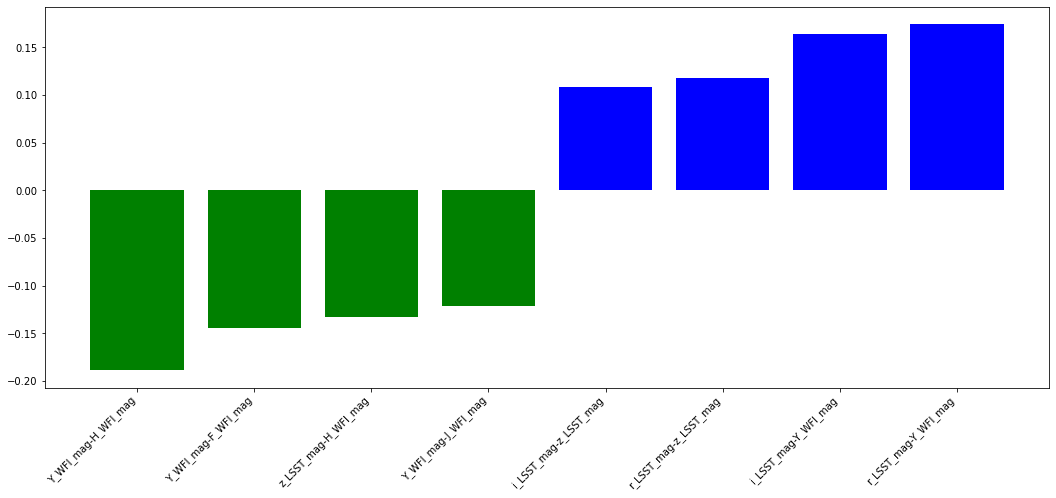

In [20]:
trainedsvm = svm.LinearSVC(max_iter = 2000).fit(X_drop_25_copy, Y_drop_25)
coef = trainedsvm.coef_.ravel()

top_positive_coefficients = np.argsort(coef)[-4:]
top_negative_coefficients = np.argsort(coef)[:4]
top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
plt.figure(figsize=(18, 7))
colors = ['green' if c < 0 else 'blue' for c in coef[top_coefficients]]
plt.bar(np.arange(2 * 4), coef[top_coefficients], color=colors)
feature_names = np.array(X_drop_25_copy.columns)
plt.xticks(np.arange(2 * 4), feature_names[top_coefficients], rotation=45, ha='right')
plt.show()

In [21]:
# keep the columns with the highest influences & check if the dataframes look reasonable
# with i-band limits
X_drop_25 = X_drop_25[['r_LSST_mag', 'i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag', 'Y_WFI_mag-H_WFI_mag', 'Y_WFI_mag-F_WFI_mag','z_LSST_mag-H_WFI_mag', 'Y_WFI_mag-J_WFI_mag', 'i_LSST_mag-z_LSST_mag', 'r_LSST_mag-z_LSST_mag', 'i_LSST_mag-Y_WFI_mag', 'r_LSST_mag-Y_WFI_mag']]

print(type(X_drop_25))
print('X with 22.0 < i < 25.0: \n', X_drop_25.head())

<class 'pandas.core.frame.DataFrame'>
X with 22.0 < i < 25.0: 
      r_LSST_mag  i_LSST_mag  z_LSST_mag  Y_WFI_mag  J_WFI_mag  H_WFI_mag  \
250   24.742821   22.094462   18.874546  18.141918  18.092987  18.074826   
304   25.848806   22.030592   19.422444  18.264333  18.076935  17.984105   
306   25.643431   22.038840   19.404501  18.273683  18.043071  17.844302   
310   25.614387   22.020449   19.134073  18.132919  17.997342  17.920215   
313   25.498590   22.068718   19.220210  18.246276  18.091573  17.966831   

     F_WFI_mag  Y_WFI_mag-H_WFI_mag  Y_WFI_mag-F_WFI_mag  \
250  17.924192             0.067092             0.217726   
304  17.798655             0.280228             0.465679   
306  17.566675             0.429381             0.707008   
310  17.727046             0.212703             0.405873   
313  17.738691             0.279445             0.507585   

     z_LSST_mag-H_WFI_mag  Y_WFI_mag-J_WFI_mag  i_LSST_mag-z_LSST_mag  \
250              0.799720             0.04893

In [22]:
X_drop_25_copy = X_drop_25.copy()

22 < i < 25.5

In [23]:
X_drop_255 = X_drop[X_drop['i_LSST_mag'] < 25.5]
X_drop_255 = X_drop_255[X_drop_255['i_LSST_mag'] > 22.0]
Y_drop_255 = data_train_drop[data_train_drop['i_LSST_mag'] < 25.5]
Y_drop_255 = Y_drop_255[Y_drop_255['i_LSST_mag'] > 22.0]['label']
col_names = ['r_LSST_mag', 'i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag']
for i in range(len(col_names)):
    for j in range(len(col_names)):
        if i < j:
            col = col_names[i] + '-' + col_names[j]
            X_drop_255[col] = X_drop_255[col_names[i]] - X_drop_255[col_names[j]]

X_drop_255_copy = X_drop_255.drop(columns=['r_LSST_mag', 'i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag'])

/data0/sw/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


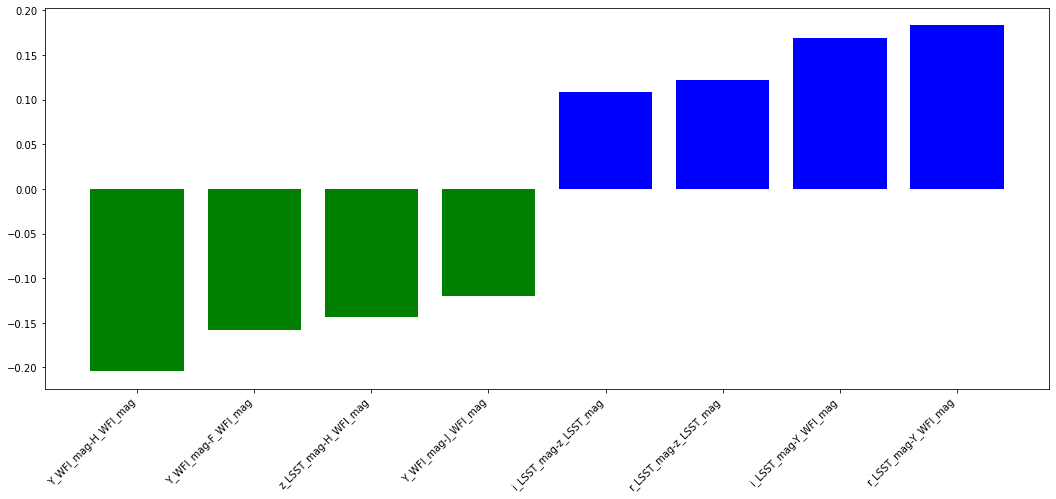

In [24]:
trainedsvm = svm.LinearSVC(max_iter = 2000).fit(X_drop_255_copy, Y_drop_255)
coef = trainedsvm.coef_.ravel()

top_positive_coefficients = np.argsort(coef)[-4:]
top_negative_coefficients = np.argsort(coef)[:4]
top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
plt.figure(figsize=(18, 7))
colors = ['green' if c < 0 else 'blue' for c in coef[top_coefficients]]
plt.bar(np.arange(2 * 4), coef[top_coefficients], color=colors)
feature_names = np.array(X_drop_255_copy.columns)
plt.xticks(np.arange(2 * 4), feature_names[top_coefficients], rotation=45, ha='right')
plt.show()

In [25]:
# keep the columns with the highest influences & check if the dataframes look reasonable
# with i-band limits
X_drop_255 = X_drop_255[['r_LSST_mag', 'i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag', 'Y_WFI_mag-H_WFI_mag', 'Y_WFI_mag-F_WFI_mag','z_LSST_mag-H_WFI_mag', 'Y_WFI_mag-J_WFI_mag', 'i_LSST_mag-z_LSST_mag', 'r_LSST_mag-z_LSST_mag', 'i_LSST_mag-Y_WFI_mag', 'r_LSST_mag-Y_WFI_mag']]

print(type(X_drop_255))
print('X with 22.0 < i < 25.5: \n', X_drop_255.head())

<class 'pandas.core.frame.DataFrame'>
X with 22.0 < i < 25.5: 
      r_LSST_mag  i_LSST_mag  z_LSST_mag  Y_WFI_mag  J_WFI_mag  H_WFI_mag  \
250   24.742821   22.094462   18.874546  18.141918  18.092987  18.074826   
304   25.848806   22.030592   19.422444  18.264333  18.076935  17.984105   
306   25.643431   22.038840   19.404501  18.273683  18.043071  17.844302   
310   25.614387   22.020449   19.134073  18.132919  17.997342  17.920215   
313   25.498590   22.068718   19.220210  18.246276  18.091573  17.966831   

     F_WFI_mag  Y_WFI_mag-H_WFI_mag  Y_WFI_mag-F_WFI_mag  \
250  17.924192             0.067092             0.217726   
304  17.798655             0.280228             0.465679   
306  17.566675             0.429381             0.707008   
310  17.727046             0.212703             0.405873   
313  17.738691             0.279445             0.507585   

     z_LSST_mag-H_WFI_mag  Y_WFI_mag-J_WFI_mag  i_LSST_mag-z_LSST_mag  \
250              0.799720             0.04893

In [26]:
X_drop_255_copy = X_drop_255.copy()

### color-color plots to decide which combinations should be used for decision boundaries 

check which ones are the most "separable"

In [27]:
import seaborn as sns

In [28]:
def color_plot(X, x_lab, y_lab):
    q = sns.jointplot(data=X, x=x_lab, y=y_lab, hue='label', kind='scatter', joint_kws={"alpha": 0.3})

### with missing values dropped

In [29]:
X_drop_245_copy['label'] = Y_drop_245
X_drop_25_copy['label'] = Y_drop_25

22.0 < i < 24.5

16


/data0/sw/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1598: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(height, height))


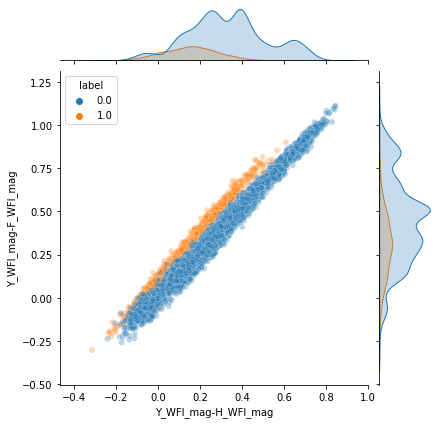

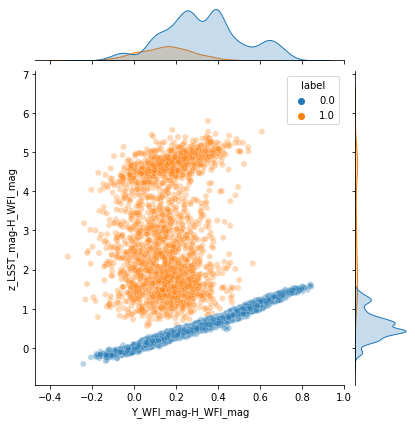

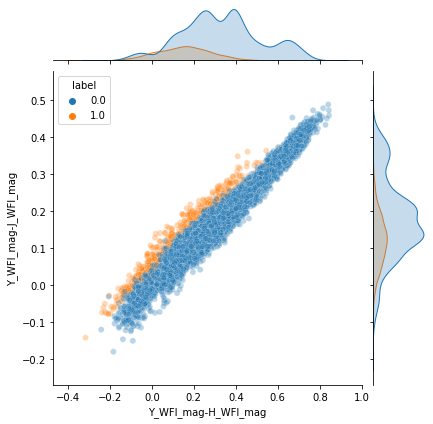

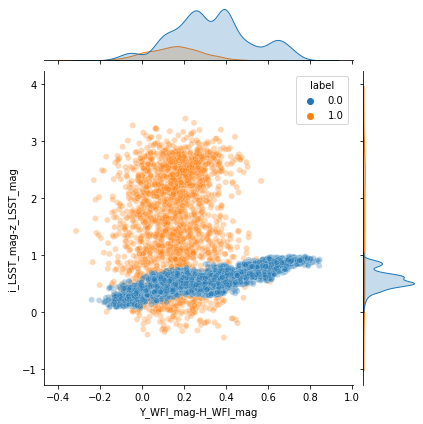

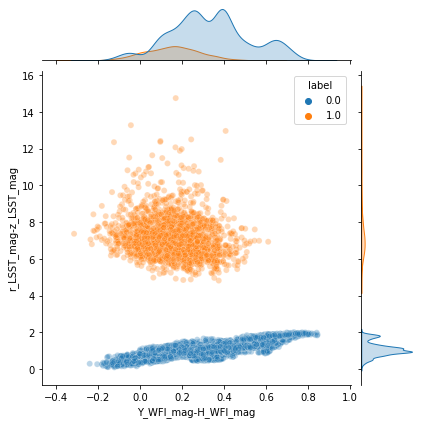

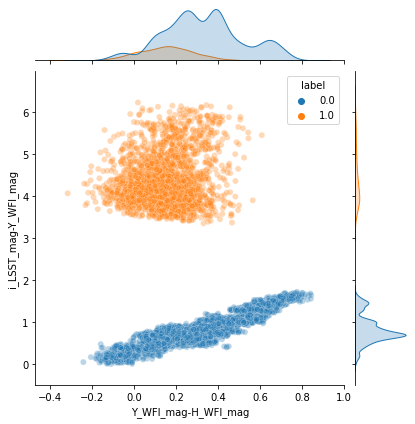

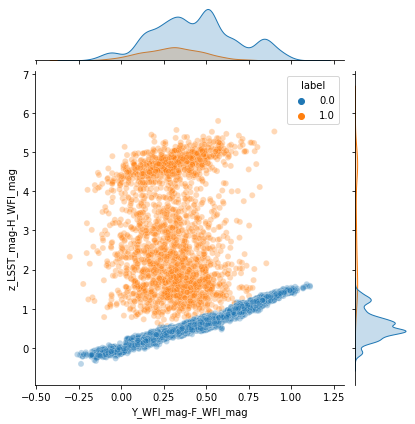

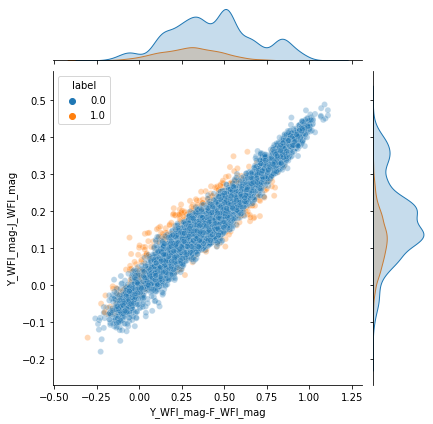

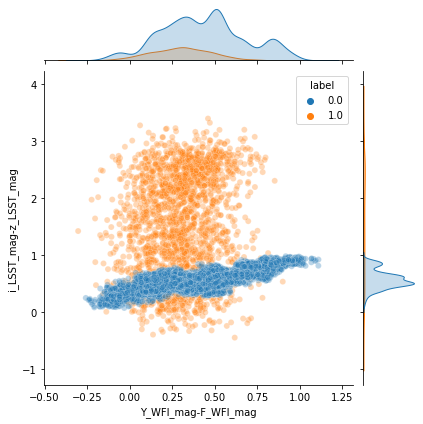

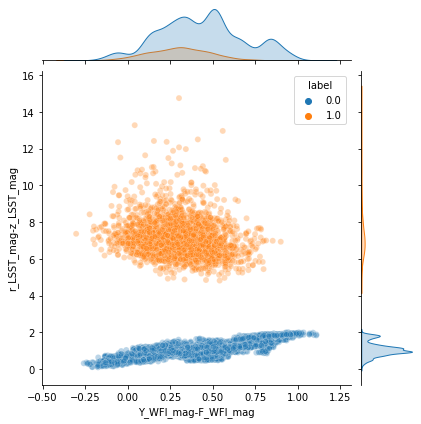

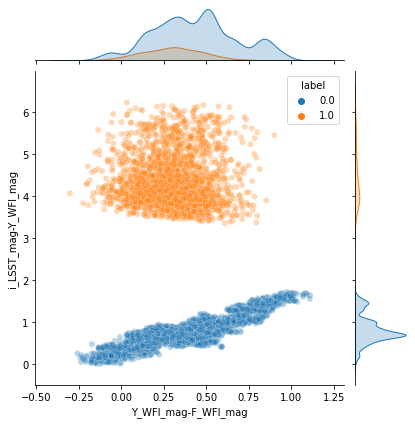

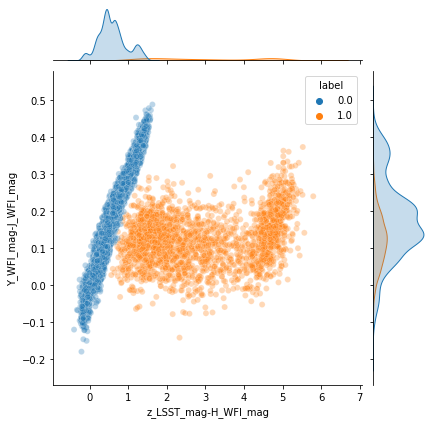

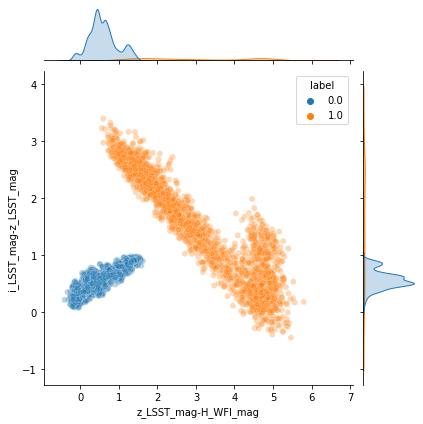

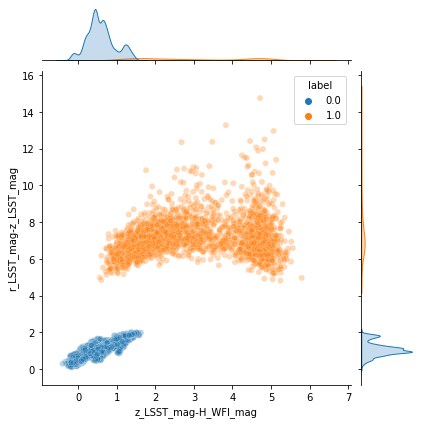

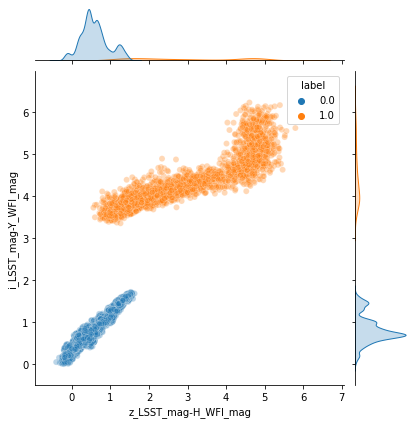

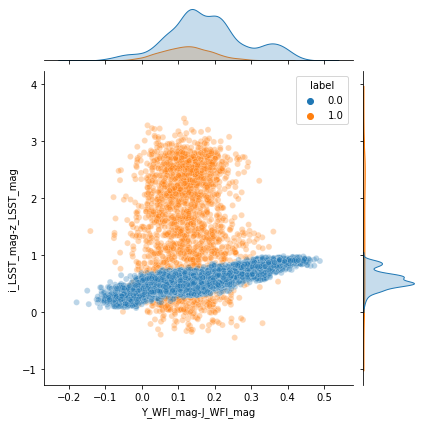

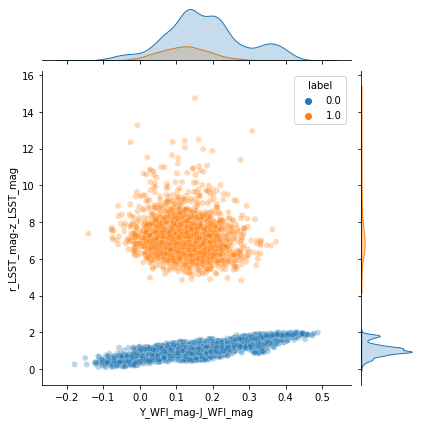

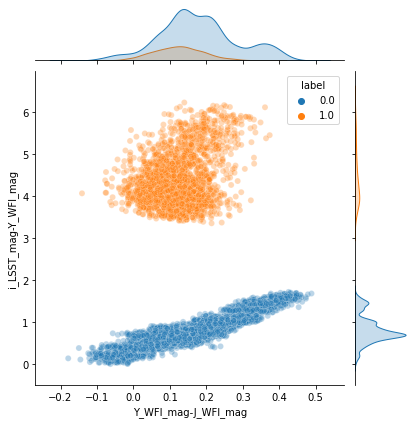

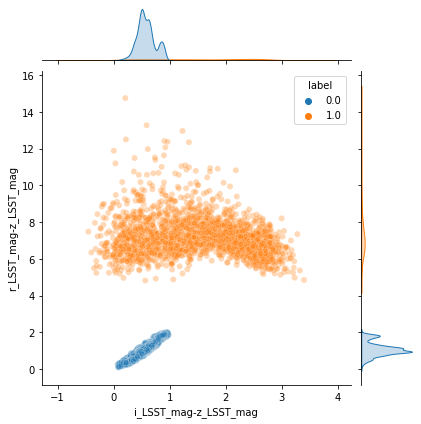

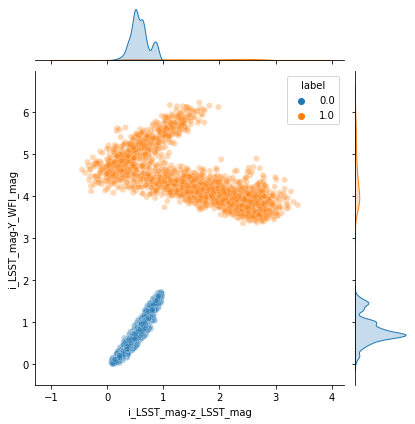

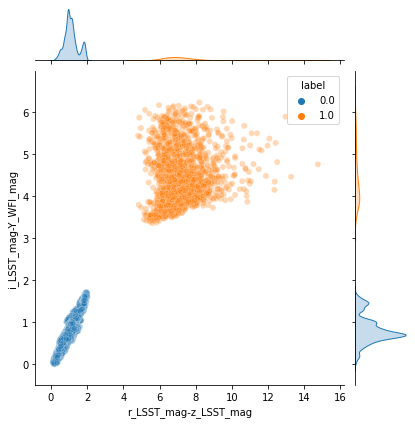

In [32]:
cols = X_drop_245_copy.columns
print(len(cols))

for i in range(7, 15):
    x_lab = cols[i]
    # range may change later 
    for j in range(i+1, 15):
        y_lab = cols[j]
        color_plot(X_drop_245_copy, x_lab, y_lab)

22.0 < i < 25.0

16


/data0/sw/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1598: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(height, height))


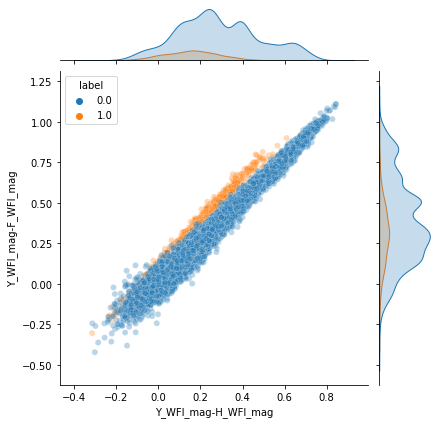

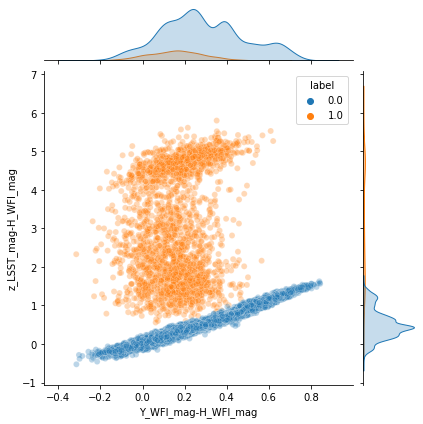

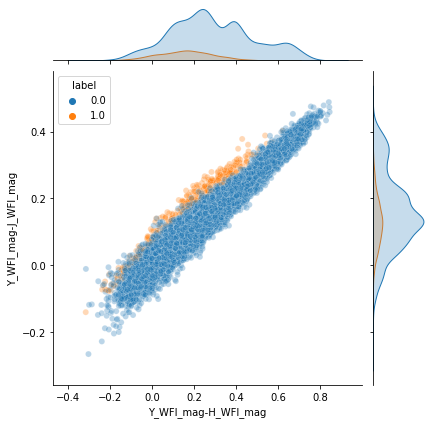

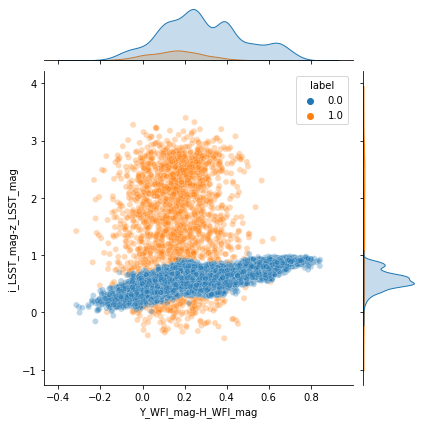

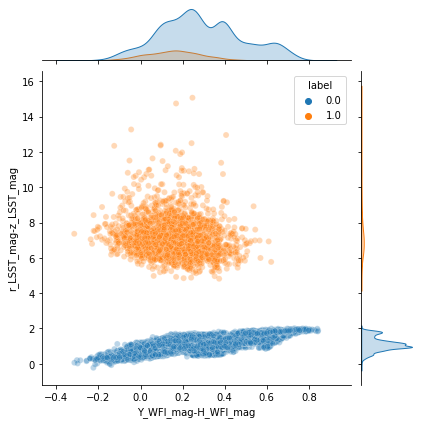

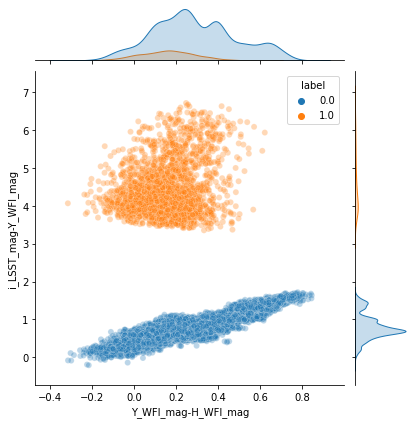

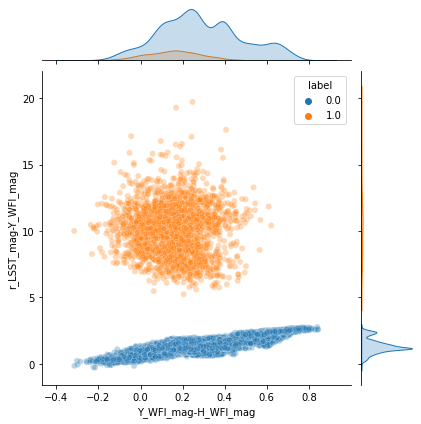

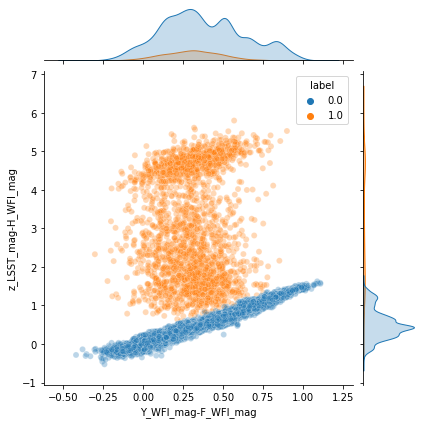

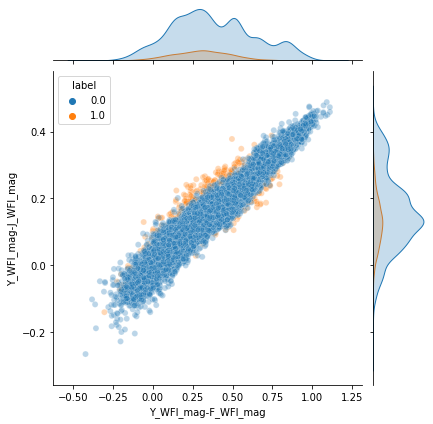

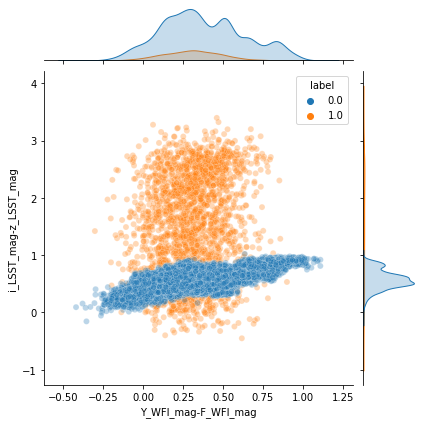

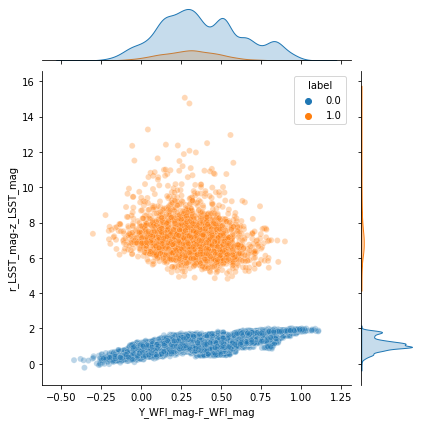

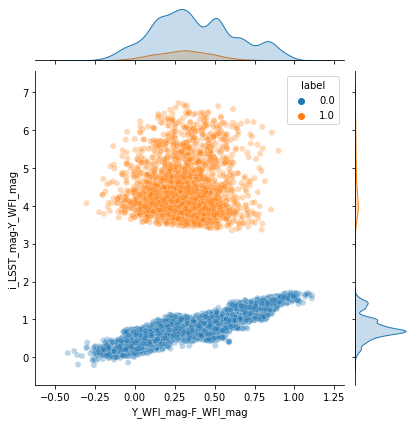

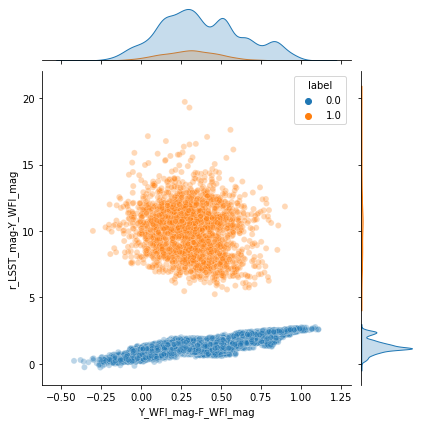

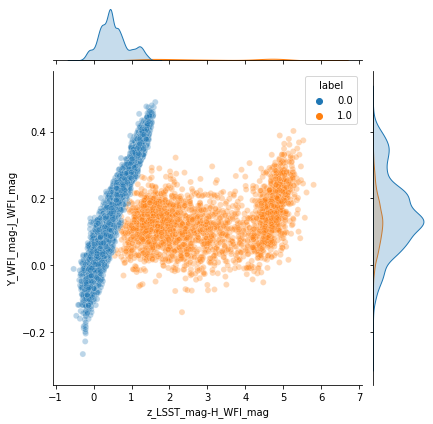

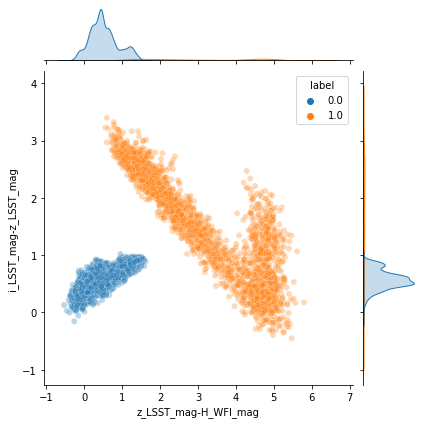

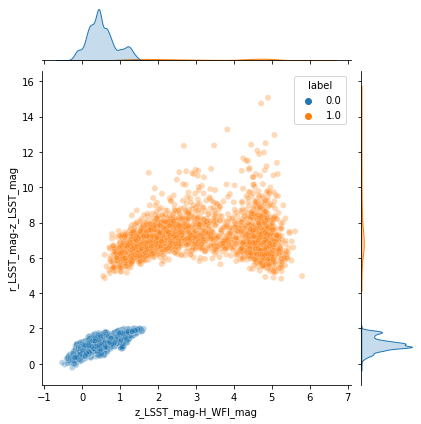

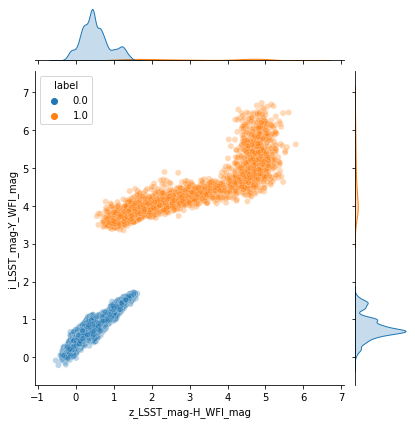

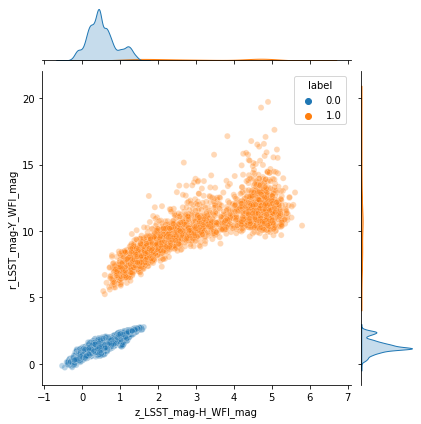

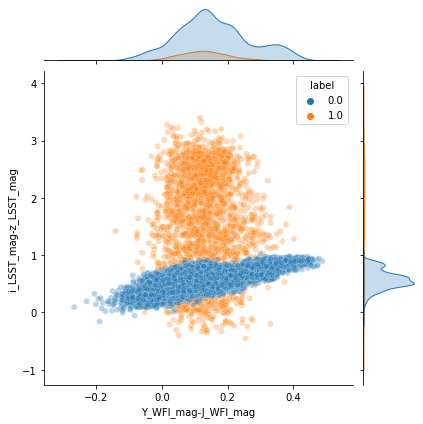

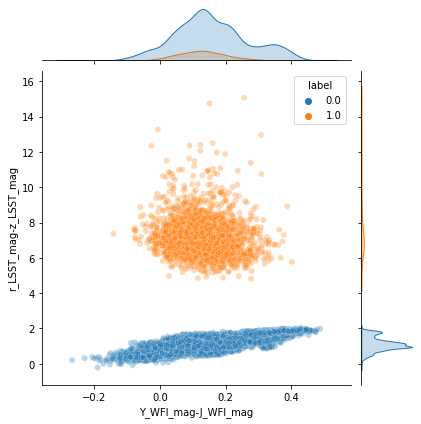

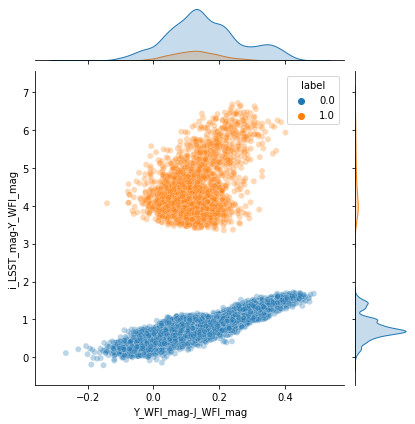

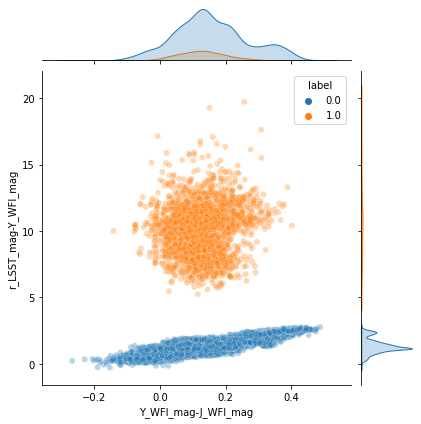

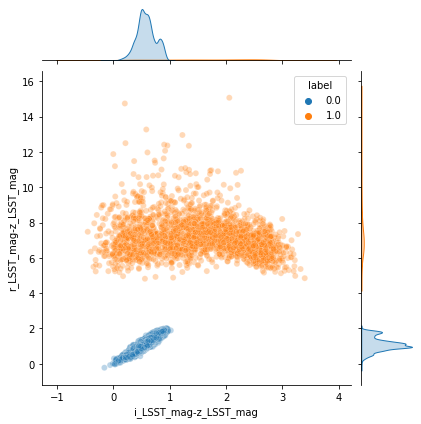

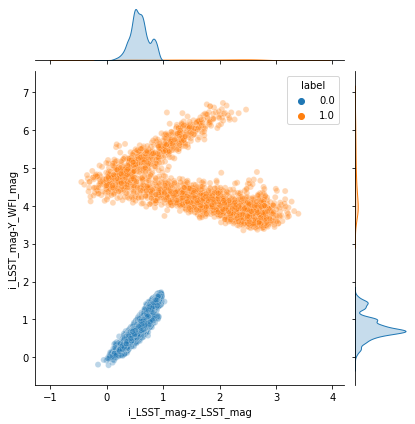

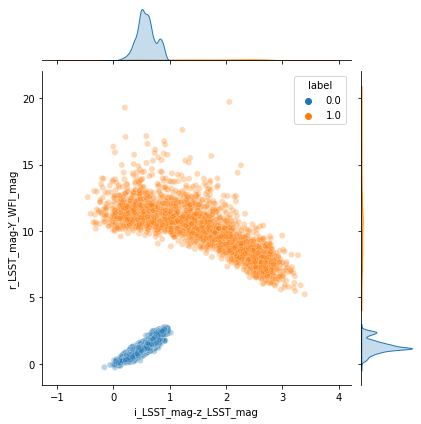

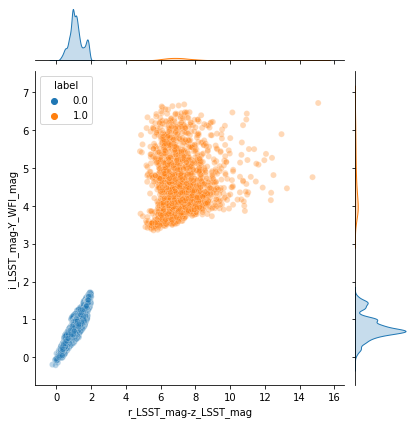

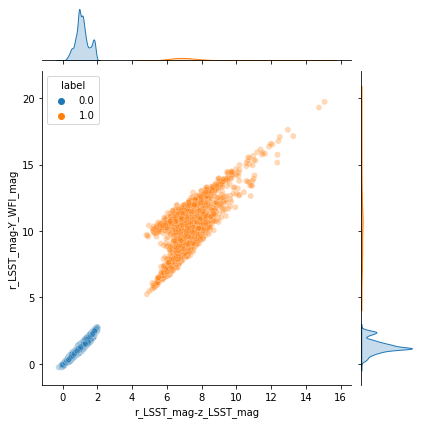

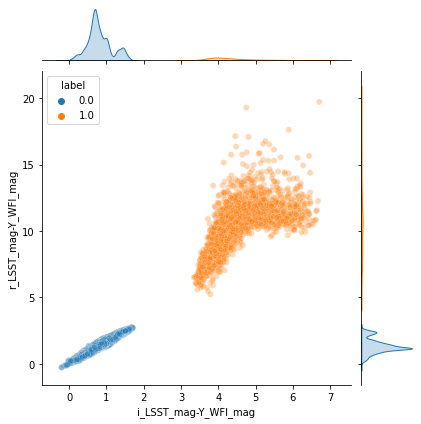

In [33]:
cols = X_drop_25_copy.columns
print(len(cols))

for i in range(7, 15):
    x_lab = cols[i]
    # range may change later 
    for j in range(i+1, 15):
        y_lab = cols[j]
        color_plot(X_drop_25_copy, x_lab, y_lab)

### KNN decision boundaries

k-fold to get some parameter estimations?

In [27]:
def n_neighbor_params(x, y, left_bound, right_bound):
    neighbors = []
    f1_lst_n = []
    train_score_n = []
    test_score_n = []

    for n_neighbor in range(left_bound, right_bound, 1):
        model = KNeighborsClassifier(n_neighbors=n_neighbor)
        kf = KFold(n_splits=10, random_state=42, shuffle=True)
        f1_sum = 0
        train_score_sum = 0
        test_score_sum = 0
        for train_index, test_index in kf.split(x):
            X_train, X_test = x[train_index], x[test_index]
            Y_train, Y_test = y[train_index], y[test_index]
            model.fit(X_train,Y_train)
            Y_pred = model.predict(X_test)
            f1 = f1_score(Y_test, Y_pred)
            f1_sum += f1
            train_score  = model.score(X_train,Y_train) # mean accuracy
            train_score_sum += train_score
            test_score = model.score(X_test,Y_test)
            test_score_sum += test_score
        f1_ave = f1_sum/10 
        train_score_ave = train_score_sum/10
        test_score_ave = test_score_sum/10
        neighbors.append(n_neighbor)
        f1_lst_n.append(f1_ave)
        train_score_n.append(train_score_ave)
        test_score_n.append(test_score_ave)
        print(n_neighbor, train_score_ave, test_score_ave, f1_ave)
    return neighbors, f1_lst_n, train_score_n, test_score_n

In [28]:
def leaf_params(x, y, left_bound, right_bound, n=5):
    leaves = []
    f1_lst_leaf = []
    train_score_leaf = []
    test_score_leaf = []

    for leaf in range(left_bound, right_bound, 1):
        model = KNeighborsClassifier(n_neighbors=n, leaf_size=leaf)
        kf = KFold(n_splits=10, random_state=42, shuffle=True)
        f1_sum = 0
        train_score_sum = 0
        test_score_sum = 0
        for train_index, test_index in kf.split(x):
            X_train, X_test = x[train_index], x[test_index]
            Y_train, Y_test = y[train_index], y[test_index]
            model.fit(X_train,Y_train)
            Y_pred = model.predict(X_test)
            f1 = f1_score(Y_test, Y_pred)
            f1_sum += f1
            train_score  = model.score(X_train,Y_train) # mean accuracy
            train_score_sum += train_score
            test_score = model.score(X_test,Y_test)
            test_score_sum += test_score
        f1_ave = f1_sum/10 
        train_score_ave = train_score_sum/10
        test_score_ave = test_score_sum/10
        leaves.append(leaf)
        f1_lst_leaf.append(f1_ave) 
        train_score_leaf.append(train_score_ave)
        test_score_leaf.append(test_score_ave)
        print(leaf, train_score_ave, test_score_ave, f1_ave)
    return leaves, f1_lst_leaf, train_score_leaf, test_score_leaf

In [29]:
def plot_params_scores(param, f1, train_score, test_score, title):
    plt.plot(param, f1, label='F1 score')
    plt.plot(param, train_score, label='train score')
    plt.plot(param, test_score, label='test score')
    plt.title(title)
    plt.legend()
    plt.show()

In [27]:
from numba import jit, cuda

In [28]:
@jit(forceobj=True, parallel=True) 
def knn_training(x1, x2, y1, y2, y, n, leaves):
    # format x1: X['r']
    # type: n -> list of integers
    features = [x1-x2, y1-y2]
    X = np.array(features).transpose()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    grid_params = { 'n_neighbors' : n,
                   'leaf_size': leaves,
                   'weights' :  ['uniform','distance'],
                   'p': [1, 2, 3, 4, 5, 6],
                   'metric' : ['minkowski','euclidean','manhattan']}

    gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)
    g_res = gs.fit(X_train, y_train)

    print('best score: ', g_res.best_score_)
    print('best params: ', g_res.best_params_)

In [29]:
def get_color_filter(clf, n_neighbors, weights, x1, x2, y1, y2, y):
    # Create color maps
    cmap_light = ListedColormap(['#75aff9', '#f7a844']) # blue, orange
    cmap_bold = ListedColormap(['#8dbcf9', '#f5a844']) 
    
    features = [x1-x2, y1-y2]
    X = np.array(features).transpose()

    # we create an instance of Neighbours Classifier and fit the data.
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = min(x1 - x2) - 1, max(x1 - x2) + 1
    y_min, y_max = min(y1 - y2) - 1, max(y1 - y2) + 1
    h = (x_max-x_min)/100
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, alpha=0.15)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, alpha=0.2)
    plt.axis([x_min, x_max, y_min, y_max])
    plt.title("k = %i, weights = '%s'"
              % (n_neighbors, weights))

In [30]:
X_drop_245_copy = X_drop_245_copy.drop(columns=['label'])
X_drop_25_copy = X_drop_25_copy.drop(columns=['label'])

KeyError: "['label'] not found in axis"

22.0 < i < 24.5

In [27]:
X_drop_245_copy = X_drop_245_copy.to_numpy()
Y_drop_245 = np.array(Y_drop_245, dtype=int)

In [28]:
neighborsd, f1_lst_nd, train_score_nd, test_score_nd = n_neighbor_params(X_drop_245_copy, Y_drop_245, 3, 31)

3 1.0 1.0 1.0
4 1.0 1.0 1.0
5 1.0 1.0 1.0
6 1.0 1.0 1.0
7 1.0 1.0 1.0
8 1.0 1.0 1.0
9 1.0 1.0 1.0
10 1.0 1.0 1.0
11 1.0 1.0 1.0
12 1.0 1.0 1.0
13 1.0 1.0 1.0
14 1.0 1.0 1.0
15 1.0 1.0 1.0
16 1.0 1.0 1.0
17 1.0 1.0 1.0
18 1.0 1.0 1.0
19 1.0 1.0 1.0
20 1.0 1.0 1.0
21 1.0 1.0 1.0
22 1.0 1.0 1.0
23 1.0 1.0 1.0
24 1.0 1.0 1.0
25 1.0 1.0 1.0
26 1.0 1.0 1.0
27 1.0 1.0 1.0
28 1.0 1.0 1.0
29 1.0 1.0 1.0
30 1.0 1.0 1.0


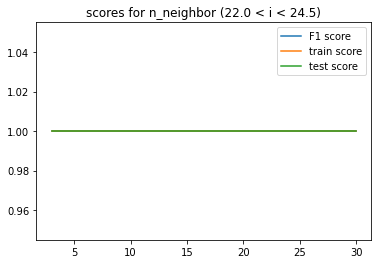

In [29]:
plot_params_scores(neighborsd, f1_lst_nd, train_score_nd, test_score_nd, 'scores for n_neighbor (22.0 < i < 24.5)')

In [30]:
df_nd = pd.DataFrame({'n_neighbors': neighborsd, 'F1 score': f1_lst_nd})
df_nd = df_nd.sort_values(by='F1 score', ascending=False)
print(df_nd.head(10))

    n_neighbors  F1 score
0             3       1.0
1             4       1.0
26           29       1.0
25           28       1.0
24           27       1.0
23           26       1.0
22           25       1.0
21           24       1.0
20           23       1.0
19           22       1.0


In [33]:
leavesd, f1_lst_leafd, train_score_leafd, test_score_leafd = leaf_params(X_drop_245_copy, Y_drop_245, 5, 41, 13)

5 1.0 1.0 1.0
6 1.0 1.0 1.0
7 1.0 1.0 1.0
8 1.0 1.0 1.0
9 1.0 1.0 1.0
10 1.0 1.0 1.0
11 1.0 1.0 1.0
12 1.0 1.0 1.0
13 1.0 1.0 1.0
14 1.0 1.0 1.0
15 1.0 1.0 1.0
16 1.0 1.0 1.0
17 1.0 1.0 1.0
18 1.0 1.0 1.0
19 1.0 1.0 1.0
20 1.0 1.0 1.0
21 1.0 1.0 1.0
22 1.0 1.0 1.0
23 1.0 1.0 1.0
24 1.0 1.0 1.0
25 1.0 1.0 1.0
26 1.0 1.0 1.0
27 1.0 1.0 1.0
28 1.0 1.0 1.0
29 1.0 1.0 1.0
30 1.0 1.0 1.0
31 1.0 1.0 1.0
32 1.0 1.0 1.0
33 1.0 1.0 1.0
34 1.0 1.0 1.0
35 1.0 1.0 1.0
36 1.0 1.0 1.0
37 1.0 1.0 1.0
38 1.0 1.0 1.0
39 1.0 1.0 1.0
40 1.0 1.0 1.0


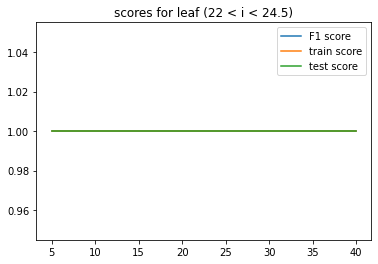

In [34]:
plot_params_scores(leavesd, f1_lst_leafd, train_score_leafd, test_score_leafd, 'scores for leaf (22 < i < 24.5)')

In [35]:
df_leafd = pd.DataFrame({'leaf_size': leavesd, 'F1 score': f1_lst_leafd})
df_leafd = df_leafd.sort_values(by='F1 score', ascending=False)
print(df_leafd.head(10))

    leaf_size  F1 score
0           5       1.0
1           6       1.0
20         25       1.0
21         26       1.0
22         27       1.0
23         28       1.0
24         29       1.0
25         30       1.0
26         31       1.0
27         32       1.0


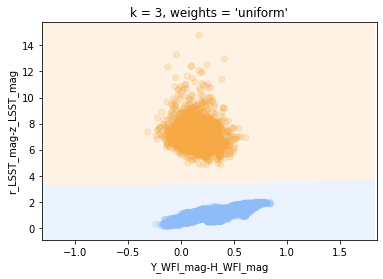

In [36]:
# x: Y - H
# y: r - z
# knn_training(X_drop_245['Y_WFI_mag'], X_drop_245['H_WFI_mag'], X_drop_245['r_LSST_mag'], X_drop_245['z_LSST_mag'], Y_drop_245, [3, 4, 5, 7, 9, 13, 14, 15, 20, 25], [5, 6, 7, 8, 9, 10, 12, 15, 20])

filter1a = KNeighborsClassifier(metric='minkowski', n_neighbors=3, leaf_size=5, weights='uniform')
get_color_filter(filter1a, 3, 'uniform', X_drop_245['Y_WFI_mag'], X_drop_245['H_WFI_mag'], X_drop_245['r_LSST_mag'], X_drop_245['z_LSST_mag'], Y_drop_245)
plt.xlabel('Y_WFI_mag-H_WFI_mag')
plt.ylabel('r_LSST_mag-z_LSST_mag')
plt.show()

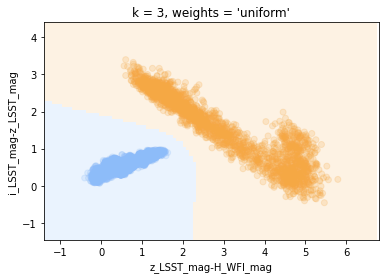

In [37]:
# x: z - H
# y: i - z
# knn_training(X_drop_245['z_LSST_mag'], X_drop_245['H_WFI_mag'], X_drop_245['i_LSST_mag'], X_drop_245['z_LSST_mag'], Y_drop_245, [3, 4, 5, 7, 9, 13, 14, 15, 20, 25], [3, 5, 6, 7, 8, 9, 10, 12, 15, 20])

filter1b = KNeighborsClassifier(metric='minkowski', n_neighbors=3, leaf_size=3, weights='uniform')
get_color_filter(filter1b, 3, 'uniform', X_drop_245['z_LSST_mag'], X_drop_245['H_WFI_mag'], X_drop_245['i_LSST_mag'], X_drop_245['z_LSST_mag'], Y_drop_245)
plt.xlabel('z_LSST_mag-H_WFI_mag')
plt.ylabel('i_LSST_mag-z_LSST_mag')
plt.show()

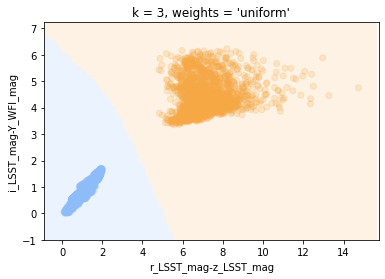

In [38]:
# x: r - z
# y: i - Y
# knn_training(X_drop_245['r_LSST_mag'], X_drop_245['z_LSST_mag'], X_drop_245['i_LSST_mag'], X_drop_245['Y_WFI_mag'], Y_drop_245, [3, 4, 5, 7, 9, 13, 14, 15, 20, 25], [5, 6, 7, 8, 9, 10, 12, 15, 20])

filter1c = KNeighborsClassifier(metric='minkowski', n_neighbors=3, leaf_size=5, weights='uniform')
get_color_filter(filter1c, 3, 'uniform', X_drop_245['r_LSST_mag'], X_drop_245['z_LSST_mag'], X_drop_245['i_LSST_mag'], X_drop_245['Y_WFI_mag'], Y_drop_245)
plt.xlabel('r_LSST_mag-z_LSST_mag')
plt.ylabel('i_LSST_mag-Y_WFI_mag')
plt.show()

### Test - 22 < i < 24.5

In [39]:
qso_test = pd.read_csv('quasar_test_catalog.csv', index_col=False)
qso_test = qso_test[['r_LSST_mag', 'i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag']]
qso_test = qso_test.replace(99.99, np.nan).dropna()
qso_test.describe()

r_LSST_mag   i_LSST_mag   z_LSST_mag    Y_WFI_mag    J_WFI_mag  \
count  5540.000000  5540.000000  5540.000000  5540.000000  5540.000000   
mean     29.788654    28.141333    25.946532    25.113679    25.090500   
std       1.325108     1.727730     2.203980     2.208496     2.224448   
min      23.737275    21.400500    18.803401    18.181244    18.048911   
25%      29.002694    27.055735    24.249919    23.451190    23.416544   
50%      29.640429    28.269932    26.080465    25.060542    25.026461   
75%      30.431686    29.143613    27.555345    26.788290    26.772365   
max      38.149953    35.495708    36.798806    35.672331    33.879891   

         H_WFI_mag    F_WFI_mag  
count  5540.000000  5540.000000  
mean     25.119312    24.908990  
std       2.228957     2.202205  
min      17.986569    17.740505  
25%      23.445880    23.249794  
50%      25.049666    24.870995  
75%      26.798924    26.584627  
max      34.514265    34.228085

In [40]:
galaxies_patch8788_partial = read_data_partial('galaxies_train_catalog_patch8788.csv', 'galaxies_patch8788_245.csv', 30000)
galaxies_patch8788_partial = galaxies_patch8788_partial.replace(99.99, np.nan).dropna()
galaxies_patch8788_partial = galaxies_patch8788_partial[['r_LSST_mag', 'i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag']]
print('galaxies_train_catalog_patch8788.csv partial data description: ')
galaxies_patch8788_partial.describe()

galaxies_train_catalog_patch8788.csv partial data description: 


r_LSST_mag    i_LSST_mag    z_LSST_mag     Y_WFI_mag     J_WFI_mag  \
count  20750.000000  20750.000000  20750.000000  20750.000000  20750.000000   
mean      25.634571     25.064565     24.472561     24.263562     24.133942   
std        1.321680      1.258280      1.250795      1.294158      1.348217   
min       20.964661     20.738443     20.199310     19.730171     19.315425   
25%       24.856448     24.321473     23.749411     23.524088     23.357096   
50%       25.801020     25.208614     24.607205     24.439207     24.332423   
75%       26.523427     25.930392     25.342387     25.182842     25.094375   
max       33.438068     32.004925     31.083271     28.285061     28.161714   

          H_WFI_mag     F_WFI_mag  
count  20750.000000  20750.000000  
mean      24.032490     23.970953  
std        1.403003      1.451221  
min       18.971169     18.750817  
25%       23.211484     23.120767  
50%       24.249539     24.205313  
75%       25.045359     25.005333  
max       30.885336     32.729688

In [41]:
mlt_test = read_data_partial('mlt_test_catalog_max25.csv', 'mlt_test_catalog_245.csv', 30000)
mlt_test = mlt_test[['r_LSST_mag', 'i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag']]
mlt_test = mlt_test.replace(99.99, np.nan).dropna()
print('mlt_test_catalog partial data description: ')
mlt_test.describe()

mlt_test_catalog partial data description: 


r_LSST_mag    i_LSST_mag    z_LSST_mag     Y_WFI_mag     J_WFI_mag  \
count  29999.000000  29999.000000  29999.000000  29999.000000  29999.000000   
mean      27.029278     22.263467     21.265794     20.463190     20.166991   
std        0.247011      0.176481      0.208298      0.207471      0.208534   
min       26.194485     22.000014     20.394267     19.725846     19.393827   
25%       26.853605     22.114063     21.116384     20.313366     20.014918   
50%       27.017674     22.240286     21.264328     20.462676     20.165549   
75%       27.190788     22.393135     21.418414     20.615854     20.322290   
max       28.242540     22.920922     21.952446     21.182426     20.963738   

          H_WFI_mag     F_WFI_mag  
count  29999.000000  29999.000000  
mean      20.038535     20.102697  
std        0.208437      0.208811  
min       19.264649     19.362965  
25%       19.886708     19.952504  
50%       20.036853     20.101656  
75%       20.194262     20.256303  
max       20.801828     20.993568

In [42]:
qso_test_copy = qso_test.copy()
qso_test_copy['label'] = np.ones(len(qso_test_copy))
galaxies_patch8788_pcopy = galaxies_patch8788_partial.copy()
galaxies_patch8788_pcopy['label'] = np.zeros(len(galaxies_patch8788_pcopy))
test_wgal = pd.concat([qso_test_copy, galaxies_patch8788_pcopy], ignore_index=True)
test_wgal.describe()

r_LSST_mag    i_LSST_mag    z_LSST_mag     Y_WFI_mag     J_WFI_mag  \
count  26290.000000  26290.000000  26290.000000  26290.000000  26290.000000   
mean      26.509946     25.712921     24.783166     24.442704     24.335514   
std        2.149161      1.858251      1.618524      1.571548      1.621540   
min       20.964661     20.738443     18.803401     18.181244     18.048911   
25%       25.139352     24.588200     23.813496     23.507708     23.364608   
50%       26.182220     25.549185     24.752150     24.508003     24.406647   
75%       27.463581     26.545962     25.634115     25.371764     25.295252   
max       38.149953     35.495708     36.798806     35.672331     33.879891   

          H_WFI_mag     F_WFI_mag         label  
count  26290.000000  26290.000000  26290.000000  
mean      24.261512     24.168623      0.210727  
std        1.672381      1.682379      0.407832  
min       17.986569     17.740505      0.000000  
25%       23.258437     23.148483      0.000000  
50%       24.346107     24.283931      0.000000  
75%       25.250710     25.206992      0.000000  
max       34.514265     34.228085      1.000000

In [43]:
mlt_test_copy = mlt_test.copy()
mlt_test_copy['label'] = np.zeros(len(mlt_test_copy))
test = pd.concat([qso_test_copy, galaxies_patch8788_pcopy, mlt_test_copy], ignore_index=True)
test.describe()

r_LSST_mag    i_LSST_mag    z_LSST_mag     Y_WFI_mag     J_WFI_mag  \
count  56289.000000  56289.000000  56289.000000  56289.000000  56289.000000   
mean      26.786722     23.874548     22.908597     22.321838     22.113916   
std        1.502292      2.142701      2.079953      2.262398      2.361478   
min       20.964661     20.738443     18.803401     18.181244     18.048911   
25%       26.313646     22.215235     21.242662     20.442634     20.146255   
50%       26.917881     22.525081     21.566955     20.774363     20.481864   
75%       27.212394     25.418688     24.629436     24.387449     24.285784   
max       38.149953     35.495708     36.798806     35.672331     33.879891   

          H_WFI_mag     F_WFI_mag         label  
count  56289.000000  56289.000000  56289.000000  
mean      22.010893     22.001704      0.098421  
std        2.401774      2.336712      0.297885  
min       17.986569     17.740505      0.000000  
25%       20.017192     20.080560      0.000000  
50%       20.349089     20.409678      0.000000  
75%       24.223016     24.158059      0.000000  
max       34.514265     34.228085      1.000000

22 < i < 24.5

In [44]:
qso_test_245 = qso_test[qso_test['i_LSST_mag'] < 24.5]
qso_test_245 = qso_test_245[qso_test_245['i_LSST_mag'] > 22.0]
qso_test_245_copy = qso_test_245.copy()
print(len(qso_test_245))

108


with galaxies added

In [45]:
test_wgal_copy = test_wgal.copy()
test_wgal_copy = test_wgal_copy.drop(columns=['label'])
test_wgal_copy = test_wgal_copy[test_wgal_copy['i_LSST_mag'] > 22.0]
test_wgal_copy = test_wgal_copy[test_wgal_copy['i_LSST_mag'] < 24.5]
print(len(test_wgal_copy))

5787


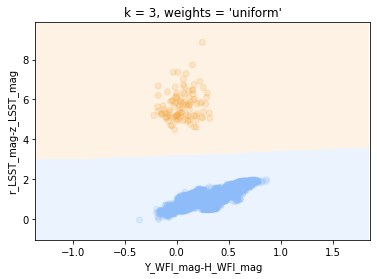

108
108
108


In [46]:
# x: Y - H
# y: r - z

features1a = [X_drop_245['Y_WFI_mag']-X_drop_245['H_WFI_mag'], X_drop_245['r_LSST_mag']-X_drop_245['z_LSST_mag']]
X1a = np.array(features1a).transpose()
filter1a.fit(X1a, Y_drop_245)
labels = filter1a.predict(np.array([test_wgal_copy['Y_WFI_mag']-test_wgal_copy['H_WFI_mag'], test_wgal_copy['r_LSST_mag']-test_wgal_copy['z_LSST_mag']]).transpose())

get_color_filter(filter1a, 3, 'uniform', test_wgal_copy['Y_WFI_mag'], test_wgal_copy['H_WFI_mag'], test_wgal_copy['r_LSST_mag'], test_wgal_copy['z_LSST_mag'], labels)
plt.xlabel('Y_WFI_mag-H_WFI_mag')
plt.ylabel('r_LSST_mag-z_LSST_mag')
plt.show()

test_wgal_copy['label'] = labels
test_wgal_copy = test_wgal_copy[test_wgal_copy['label'] == 1]
print(len(test_wgal_copy))

# x: z - H
# y: i - z
features1b = [X_drop_245['z_LSST_mag']-X_drop_245['H_WFI_mag'], X_drop_245['i_LSST_mag']-X_drop_245['z_LSST_mag']]
X1b = np.array(features1b).transpose()
filter1b.fit(X1b, Y_drop_245)
labels = filter1b.predict(np.array([test_wgal_copy['z_LSST_mag']-test_wgal_copy['H_WFI_mag'], test_wgal_copy['i_LSST_mag']-test_wgal_copy['z_LSST_mag']]).transpose())

test_wgal_copy['label'] = labels
test_wgal_copy = test_wgal_copy[test_wgal_copy['label'] == 1]
print(len(test_wgal_copy))

# x: r - z
# y: i - Y
features1c = [X_drop_245['r_LSST_mag']-X_drop_245['z_LSST_mag'], X_drop_245['i_LSST_mag']-X_drop_245['Y_WFI_mag']]
X1c = np.array(features1c).transpose()
filter1c.fit(X1c, Y_drop_245)
labels = filter1c.predict(np.array([test_wgal_copy['r_LSST_mag']-test_wgal_copy['z_LSST_mag'], test_wgal_copy['i_LSST_mag']-test_wgal_copy['Y_WFI_mag']]).transpose())

test_wgal_copy['label'] = labels
test_wgal_copy = test_wgal_copy[test_wgal_copy['label'] == 1]
print(len(test_wgal_copy))

In [46]:
print(set(qso_test_245).issubset(set(test_wgal_copy)))

True


with galaxies and brown dwarfs

In [47]:
test_copy = test.copy()
test_copy = test_copy[test_copy['i_LSST_mag'] > 22.0]
test_copy = test_copy[test_copy['i_LSST_mag'] < 24.5]
print(len(test_copy))
print(len(test_copy[test_copy['label'] == 1]))

35786
108


In [48]:
# x: Y - H
# y: r - z

features1a = [X_drop_245['Y_WFI_mag']-X_drop_245['H_WFI_mag'], X_drop_245['r_LSST_mag']-X_drop_245['z_LSST_mag']]
X1a = np.array(features1a).transpose()
filter1a.fit(X1a, Y_drop_245)
labels = filter1a.predict(np.array([test_copy['Y_WFI_mag']-test_copy['H_WFI_mag'], test_copy['r_LSST_mag']-test_copy['z_LSST_mag']]).transpose())

test_copy['label'] = labels
test_copy = test_copy[test_copy['label'] == 1]
print(len(test_copy))

# x: z - H
# y: i - z
features1b = [X_drop_245['z_LSST_mag']-X_drop_245['H_WFI_mag'], X_drop_245['i_LSST_mag']-X_drop_245['z_LSST_mag']]
X1b = np.array(features1b).transpose()
filter1b.fit(X1b, Y_drop_245)
labels = filter1b.predict(np.array([test_copy['z_LSST_mag']-test_copy['H_WFI_mag'], test_copy['i_LSST_mag']-test_copy['z_LSST_mag']]).transpose())

test_copy['label'] = labels
test_copy = test_copy[test_copy['label'] == 1]
print(len(test_copy))

# x: r - z
# y: i - Y
features1c = [X_drop_245['r_LSST_mag']-X_drop_245['z_LSST_mag'], X_drop_245['i_LSST_mag']-X_drop_245['Y_WFI_mag']]
X1c = np.array(features1c).transpose()
filter1c.fit(X1c, Y_drop_245)
labels = filter1c.predict(np.array([test_copy['r_LSST_mag']-test_copy['z_LSST_mag'], test_copy['i_LSST_mag']-test_copy['Y_WFI_mag']]).transpose())

test_copy['label'] = labels
test_copy = test_copy[test_copy['label'] == 1]
print(len(test_copy))

30107
109
109


In [49]:
print(set(qso_test_245).issubset(set(test_copy)))

True


22.0 < i < 25.0

In [28]:
X_drop_25_copy = X_drop_25_copy.to_numpy()
Y_drop_25 = np.array(Y_drop_25, dtype=int)

In [35]:
neighbors2, f1_lst_n2, train_score_n2, test_score_n2 = n_neighbor_params(X_drop_25_copy, Y_drop_25, 3, 31)

3 1.0 1.0 1.0
4 1.0 1.0 1.0
5 1.0 1.0 1.0
6 1.0 1.0 1.0
7 1.0 1.0 1.0
8 1.0 1.0 1.0
9 1.0 1.0 1.0
10 1.0 1.0 1.0
11 1.0 1.0 1.0
12 1.0 1.0 1.0
13 1.0 1.0 1.0
14 1.0 1.0 1.0
15 1.0 1.0 1.0
16 1.0 1.0 1.0
17 1.0 1.0 1.0
18 1.0 1.0 1.0
19 1.0 1.0 1.0
20 1.0 1.0 1.0
21 1.0 1.0 1.0
22 1.0 1.0 1.0
23 1.0 1.0 1.0
24 1.0 1.0 1.0
25 1.0 1.0 1.0
26 1.0 1.0 1.0
27 1.0 1.0 1.0
28 1.0 1.0 1.0
29 1.0 1.0 1.0
30 1.0 1.0 1.0


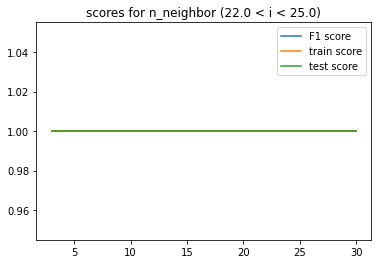

In [70]:
plot_params_scores(neighbors2, f1_lst_n2, train_score_n2, test_score_n2, 'scores for n_neighbor (22.0 < i < 25.0)')

In [71]:
df_n2 = pd.DataFrame({'n_neighbors': neighbors2, 'F1 score': f1_lst_n2})
df_n2 = df_n2.sort_values(by='F1 score', ascending=False)
print(df_n2.head(10))

    n_neighbors  F1 score
0             3       1.0
1             4       1.0
26           29       1.0
25           28       1.0
24           27       1.0
23           26       1.0
22           25       1.0
21           24       1.0
20           23       1.0
19           22       1.0


In [72]:
leaves2, f1_lst_leaf2, train_score_leaf2, test_score_leaf2 = leaf_params(X_drop_25_copy, Y_drop_25, 5, 41, 4)

5 1.0 1.0 1.0
6 1.0 1.0 1.0
7 1.0 1.0 1.0
8 1.0 1.0 1.0
9 1.0 1.0 1.0
10 1.0 1.0 1.0
11 1.0 1.0 1.0
12 1.0 1.0 1.0
13 1.0 1.0 1.0
14 1.0 1.0 1.0
15 1.0 1.0 1.0
16 1.0 1.0 1.0
17 1.0 1.0 1.0
18 1.0 1.0 1.0
19 1.0 1.0 1.0
20 1.0 1.0 1.0
21 1.0 1.0 1.0
22 1.0 1.0 1.0
23 1.0 1.0 1.0
24 1.0 1.0 1.0
25 1.0 1.0 1.0
26 1.0 1.0 1.0
27 1.0 1.0 1.0
28 1.0 1.0 1.0
29 1.0 1.0 1.0
30 1.0 1.0 1.0
31 1.0 1.0 1.0
32 1.0 1.0 1.0
33 1.0 1.0 1.0
34 1.0 1.0 1.0
35 1.0 1.0 1.0
36 1.0 1.0 1.0
37 1.0 1.0 1.0
38 1.0 1.0 1.0
39 1.0 1.0 1.0
40 1.0 1.0 1.0


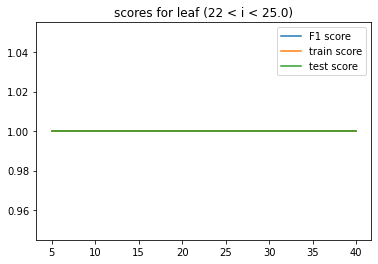

In [73]:
plot_params_scores(leaves2, f1_lst_leaf2, train_score_leaf2, test_score_leaf2, 'scores for leaf (22 < i < 25.0)')

In [74]:
df_leaf2 = pd.DataFrame({'leaf_size': leaves2, 'F1 score': f1_lst_leaf2})
df_leaf2 = df_leaf2.sort_values(by='F1 score', ascending=False)
print(df_leaf2.head(10))

    leaf_size  F1 score
0           5       1.0
1           6       1.0
20         25       1.0
21         26       1.0
22         27       1.0
23         28       1.0
24         29       1.0
25         30       1.0
26         31       1.0
27         32       1.0


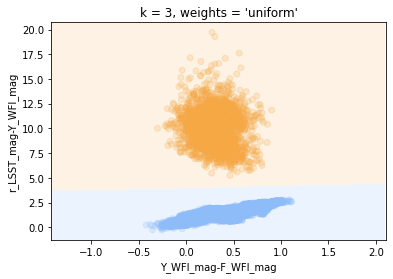

In [31]:
# x: Y - F
# y: r - Y
# knn_training(X_drop_25['Y_WFI_mag'], X_drop_25['F_WFI_mag'], X_drop_25['r_LSST_mag'], X_drop_25['Y_WFI_mag'], Y_drop_25, [i for i in range(3, 26)], [5, 6, 7, 8, 9, 10, 12, 15, 20])

filter2a = KNeighborsClassifier(metric='minkowski', n_neighbors=3, leaf_size=5, weights='uniform')
get_color_filter(filter2a, 3, 'uniform', X_drop_25['Y_WFI_mag'], X_drop_25['F_WFI_mag'], X_drop_25['r_LSST_mag'], X_drop_25['Y_WFI_mag'], Y_drop_25)
plt.xlabel('Y_WFI_mag-F_WFI_mag')
plt.ylabel('r_LSST_mag-Y_WFI_mag')
plt.show()

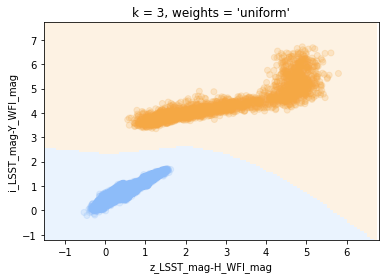

In [32]:
# x: z - H
# y: i - Y
# knn_training(X_drop_25['z_LSST_mag'], X_drop_25['H_WFI_mag'], X_drop_25['i_LSST_mag'], X_drop_25['Y_WFI_mag'], Y_drop_25, [3, 4, 5, 7, 9, 13, 14, 15, 20], [3, 5, 6, 8])

filter2b = KNeighborsClassifier(metric='minkowski', n_neighbors=3, leaf_size=3, weights='uniform')
get_color_filter(filter2b, 3, 'uniform', X_drop_25['z_LSST_mag'], X_drop_25['H_WFI_mag'], X_drop_25['i_LSST_mag'], X_drop_25['Y_WFI_mag'], Y_drop_25)
plt.xlabel('z_LSST_mag-H_WFI_mag')
plt.ylabel('i_LSST_mag-Y_WFI_mag')
plt.show()

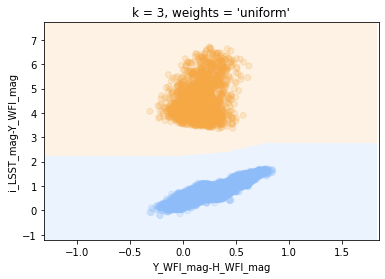

In [39]:
# x: Y - H
# y: i - Y
# knn_training(X_drop_25['Y_WFI_mag'], X_drop_25['H_WFI_mag'], X_drop_25['i_LSST_mag'], X_drop_25['Y_WFI_mag'], Y_drop_25, [3, 5, 7, 9, 13, 15, 20], [3, 5, 6])
# best score:  0.9980201286646854
# best params:  {'leaf_size': 3, 'metric': 'minkowski', 'n_neighbors': 5, 'p': 4, 'weights': 'uniform'}

filter2c = KNeighborsClassifier(metric='minkowski', n_neighbors=3, leaf_size=3, weights='uniform', p=1)
get_color_filter(filter2c, 3, 'uniform', X_drop_25['Y_WFI_mag'], X_drop_25['H_WFI_mag'], X_drop_25['i_LSST_mag'], X_drop_25['Y_WFI_mag'], Y_drop_25)
plt.xlabel('Y_WFI_mag-H_WFI_mag')
plt.ylabel('i_LSST_mag-Y_WFI_mag')
plt.show()

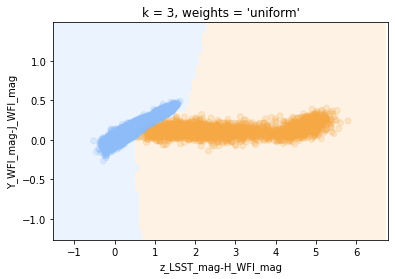

In [41]:
# x: z - H
# y: Y - J
# knn_training(X_drop_25['z_LSST_mag'], X_drop_25['H_WFI_mag'], X_drop_25['Y_WFI_mag'], X_drop_25['J_WFI_mag'], Y_drop_25, [3, 4, 5, 7, 9, 13, 14, 15, 20, 25], [3, 5, 6, 8])
# best score:  0.9995050730017322
# best params:  {'leaf_size': 3, 'metric': 'minkowski', 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}

filter2d = KNeighborsClassifier(metric='minkowski', n_neighbors=3, leaf_size=3, weights='uniform', p=2)
get_color_filter(filter2d, 3, 'uniform', X_drop_25['z_LSST_mag'], X_drop_25['H_WFI_mag'], X_drop_25['Y_WFI_mag'], X_drop_25['J_WFI_mag'], Y_drop_25)
plt.xlabel('z_LSST_mag-H_WFI_mag')
plt.ylabel('Y_WFI_mag-J_WFI_mag')
plt.show()

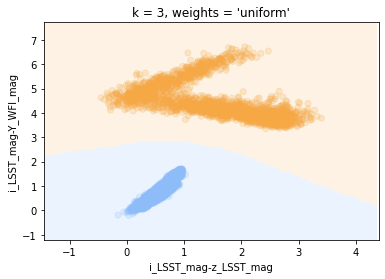

In [42]:
# x: i - z
# y: i - Y
# knn_training(X_drop_25['i_LSST_mag'], X_drop_25['z_LSST_mag'], X_drop_25['i_LSST_mag'], X_drop_25['Y_WFI_mag'], Y_drop_25, [3, 4, 5, 7, 9, 14], [3, 5, 8])

filter2e = KNeighborsClassifier(metric='minkowski', n_neighbors=3, leaf_size=3, weights='uniform')
get_color_filter(filter2e, 3, 'uniform', X_drop_25['i_LSST_mag'], X_drop_25['z_LSST_mag'], X_drop_25['i_LSST_mag'], X_drop_25['Y_WFI_mag'], Y_drop_25)
plt.xlabel('i_LSST_mag-z_LSST_mag')
plt.ylabel('i_LSST_mag-Y_WFI_mag')
plt.show()

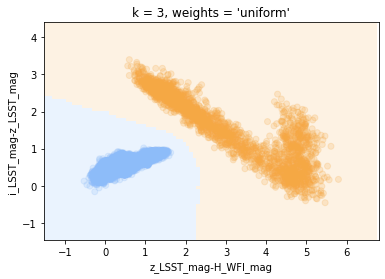

In [43]:
# x: z - H
# y: i - z
# knn_training(X_drop_25['z_LSST_mag'], X_drop_25['H_WFI_mag'], X_drop_25['i_LSST_mag'], X_drop_25['z_LSST_mag'], Y_drop_25, [3, 4, 5, 7, 9], [3, 5, 8])

filter2f = KNeighborsClassifier(metric='minkowski', n_neighbors=3, leaf_size=3, weights='uniform')
get_color_filter(filter2f, 3, 'uniform', X_drop_25['z_LSST_mag'], X_drop_25['H_WFI_mag'], X_drop_25['i_LSST_mag'], X_drop_25['z_LSST_mag'], Y_drop_25)
plt.xlabel('z_LSST_mag-H_WFI_mag')
plt.ylabel('i_LSST_mag-z_LSST_mag')
plt.show()

### Test - 22 < i < 25.0

In [44]:
qso_test = pd.read_csv('quasar_test_catalog.csv', index_col=False)
qso_test = qso_test[['z','r_LSST_mag', 'i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag']]
qso_test = qso_test.replace(99.99, np.nan).dropna()
qso_test.describe()

z   r_LSST_mag   i_LSST_mag   z_LSST_mag    Y_WFI_mag  \
count  5540.000000  5540.000000  5540.000000  5540.000000  5540.000000   
mean      6.304751    29.788654    28.141333    25.946532    25.113679   
std       0.289486     1.325108     1.727730     2.203980     2.208496   
min       6.000077    23.737275    21.400500    18.803401    18.181244   
25%       6.094965    29.002694    27.055735    24.249919    23.451190   
50%       6.222428    29.640429    28.269932    26.080465    25.060542   
75%       6.422711    30.431686    29.143613    27.555345    26.788290   
max       8.482816    38.149953    35.495708    36.798806    35.672331   

         J_WFI_mag    H_WFI_mag    F_WFI_mag  
count  5540.000000  5540.000000  5540.000000  
mean     25.090500    25.119312    24.908990  
std       2.224448     2.228957     2.202205  
min      18.048911    17.986569    17.740505  
25%      23.416544    23.445880    23.249794  
50%      25.026461    25.049666    24.870995  
75%      26.772365    26.798924    26.584627  
max      33.879891    34.514265    34.228085

In [45]:
galaxies_patch8788_partial = read_data_partial('galaxies_train_catalog_patch8788.csv', 'galaxies_patch8788_245.csv', 30000)
galaxies_patch8788_partial = galaxies_patch8788_partial.replace(99.99, np.nan).dropna()
galaxies_patch8788_partial = galaxies_patch8788_partial[['z', 'r_LSST_mag', 'i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag']]
print('galaxies_train_catalog_patch8788.csv partial data description: ')
galaxies_patch8788_partial.describe()

galaxies_train_catalog_patch8788.csv partial data description: 


z    r_LSST_mag    i_LSST_mag    z_LSST_mag     Y_WFI_mag  \
count  20750.000000  20750.000000  20750.000000  20750.000000  20750.000000   
mean       1.032609     25.634571     25.064565     24.472561     24.263562   
std        0.014266      1.321680      1.258280      1.250795      1.294158   
min        1.005989     20.964661     20.738443     20.199310     19.730171   
25%        1.020363     24.856448     24.321473     23.749411     23.524088   
50%        1.033982     25.801020     25.208614     24.607205     24.439207   
75%        1.045150     26.523427     25.930392     25.342387     25.182842   
max        1.055212     33.438068     32.004925     31.083271     28.285061   

          J_WFI_mag     H_WFI_mag     F_WFI_mag  
count  20750.000000  20750.000000  20750.000000  
mean      24.133942     24.032490     23.970953  
std        1.348217      1.403003      1.451221  
min       19.315425     18.971169     18.750817  
25%       23.357096     23.211484     23.120767  
50%       24.332423     24.249539     24.205313  
75%       25.094375     25.045359     25.005333  
max       28.161714     30.885336     32.729688

In [46]:
mlt_test = read_data_partial('mlt_test_catalog_max26.csv', 'mlt_test_catalog_255.csv', 100000)
mlt_test = mlt_test.sample(frac=0.4, replace=False, random_state=42)
mlt_test = mlt_test[['r_LSST_mag', 'i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag']]
mlt_test = mlt_test.replace(99.99, np.nan).dropna()
mlt_test['z'] = np.zeros(mlt_test.shape[0])
print('mlt_test_catalog partial data description: ')
mlt_test.describe()

mlt_test_catalog partial data description: 


r_LSST_mag    i_LSST_mag    z_LSST_mag     Y_WFI_mag     J_WFI_mag  \
count  39995.000000  39995.000000  39995.000000  39995.000000  39995.000000   
mean      26.997202     22.847905     21.668471     20.765261     20.444840   
std        0.601555      0.590803      0.527936      0.510114      0.507987   
min       25.271725     22.000020     20.269298     19.136802     18.942683   
25%       26.666033     22.325603     21.242883     20.384266     20.076415   
50%       27.026416     22.752097     21.613354     20.729046     20.414105   
75%       27.367609     23.330051     22.078231     21.149319     20.825999   
max       32.858471     24.518611     23.541767     22.762333     22.458010   

          H_WFI_mag     F_WFI_mag        z  
count  39995.000000  39995.000000  39995.0  
mean      20.314135     20.314627      0.0  
std        0.508961      0.507175      0.0  
min       18.783449     18.733884      0.0  
25%       19.944635     19.970917      0.0  
50%       20.284399     20.298322      0.0  
75%       20.695270     20.687611      0.0  
max       22.288556     22.504555      0.0

In [47]:
qso_test_copy = qso_test.copy()
qso_test_copy['label'] = np.ones(len(qso_test_copy))
galaxies_patch8788_pcopy = galaxies_patch8788_partial.copy()
galaxies_patch8788_pcopy['label'] = np.zeros(len(galaxies_patch8788_pcopy))
test_wgal = pd.concat([qso_test_copy, galaxies_patch8788_pcopy], ignore_index=True)
test_wgal.describe()

z    r_LSST_mag    i_LSST_mag    z_LSST_mag     Y_WFI_mag  \
count  26290.000000  26290.000000  26290.000000  26290.000000  26290.000000   
mean       2.143589     26.509946     25.712921     24.783166     24.442704   
std        2.154289      2.149161      1.858251      1.618524      1.571548   
min        1.005989     20.964661     20.738443     18.803401     18.181244   
25%        1.023576     25.139352     24.588200     23.813496     23.507708   
50%        1.039947     26.182220     25.549185     24.752150     24.508003   
75%        1.053059     27.463581     26.545962     25.634115     25.371764   
max        8.482816     38.149953     35.495708     36.798806     35.672331   

          J_WFI_mag     H_WFI_mag     F_WFI_mag         label  
count  26290.000000  26290.000000  26290.000000  26290.000000  
mean      24.335514     24.261512     24.168623      0.210727  
std        1.621540      1.672381      1.682379      0.407832  
min       18.048911     17.986569     17.740505      0.000000  
25%       23.364608     23.258437     23.148483      0.000000  
50%       24.406647     24.346107     24.283931      0.000000  
75%       25.295252     25.250710     25.206992      0.000000  
max       33.879891     34.514265     34.228085      1.000000

In [48]:
mlt_test_copy = mlt_test.copy()
mlt_test_copy['label'] = np.zeros(len(mlt_test_copy))
test0 = pd.concat([qso_test_copy, galaxies_patch8788_pcopy, mlt_test_copy], ignore_index=True)
test = test0[['r_LSST_mag', 'i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag', 'label']]
test.describe()

r_LSST_mag    i_LSST_mag    z_LSST_mag     Y_WFI_mag     J_WFI_mag  \
count  66285.000000  66285.000000  66285.000000  66285.000000  66285.000000   
mean      26.803946     23.984230     22.903823     22.223811     21.987962   
std        1.451573      1.882692      1.878517      2.091162      2.195714   
min       20.964661     20.738443     18.803401     18.181244     18.048911   
25%       26.127461     22.553157     21.463744     20.599774     20.290025   
50%       26.886467     23.385994     22.173454     21.283549     20.958189   
75%       27.376274     25.074778     24.313794     24.039894     23.925974   
max       38.149953     35.495708     36.798806     35.672331     33.879891   

          H_WFI_mag     F_WFI_mag         label  
count  66285.000000  66285.000000  66285.000000  
mean      21.879746     21.843201      0.083578  
std        2.234847      2.198273      0.276757  
min       17.986569     17.740505      0.000000  
25%       20.160599     20.178190      0.000000  
50%       20.826658     20.802575      0.000000  
75%       23.837123     23.760279      0.000000  
max       34.514265     34.228085      1.000000

In [49]:
qso_test_25 = qso_test[qso_test['i_LSST_mag'] < 25.0]
qso_test_25 = qso_test_25[qso_test_25['i_LSST_mag'] > 22.0]
qso_test_25_copy = qso_test_25.copy()
print(len(qso_test_25))

224


with galaxies added

In [50]:
test_wgal_copy = test_wgal.copy()
test_wgal_copy = test_wgal_copy.drop(columns=['label'])
test_wgal_copy = test_wgal_copy[test_wgal_copy['i_LSST_mag'] > 22.0]
test_wgal_copy = test_wgal_copy[test_wgal_copy['i_LSST_mag'] < 25.0]
print(len(test_wgal_copy))

8837


In [51]:
# x: Y - F
# y: r - Y

features2a = [X_drop_25['Y_WFI_mag']-X_drop_25['F_WFI_mag'], X_drop_25['r_LSST_mag']-X_drop_25['Y_WFI_mag']]
X2a = np.array(features2a).transpose()
filter2a.fit(X2a, Y_drop_25)
labels = filter2a.predict(np.array([test_wgal_copy['Y_WFI_mag']-test_wgal_copy['F_WFI_mag'], test_wgal_copy['r_LSST_mag']-test_wgal_copy['Y_WFI_mag']]).transpose())

test_wgal_copy['label'] = labels
test_wgal_copy = test_wgal_copy[test_wgal_copy['label'] == 1]
print(len(test_wgal_copy))

# x: z - H
# y: i - Y
features2b = [X_drop_25['z_LSST_mag']-X_drop_25['H_WFI_mag'], X_drop_25['i_LSST_mag']-X_drop_25['Y_WFI_mag']]
X2b = np.array(features2b).transpose()
filter2b.fit(X2b, Y_drop_25)
labels = filter2b.predict(np.array([test_wgal_copy['z_LSST_mag']-test_wgal_copy['H_WFI_mag'], test_wgal_copy['i_LSST_mag']-test_wgal_copy['Y_WFI_mag']]).transpose())

test_wgal_copy['label'] = labels
test_wgal_copy = test_wgal_copy[test_wgal_copy['label'] == 1]
print(len(test_wgal_copy))

# x: i - z
# y: r - z
features2c = [X_drop_25['i_LSST_mag']-X_drop_25['z_LSST_mag'], X_drop_25['r_LSST_mag']-X_drop_25['z_LSST_mag']]
X2c = np.array(features2c).transpose()
filter2c.fit(X2c, Y_drop_25)
labels = filter2c.predict(np.array([test_wgal_copy['i_LSST_mag']-test_wgal_copy['z_LSST_mag'], test_wgal_copy['r_LSST_mag']-test_wgal_copy['z_LSST_mag']]).transpose())

test_wgal_copy['label'] = labels
test_wgal_copy = test_wgal_copy[test_wgal_copy['label'] == 1]
print(len(test_wgal_copy))

224
224
224


In [79]:
print(set(qso_test_25).issubset(set(test_wgal_copy)))

True


with galaxies and brown dwarfs

In [60]:
test_copy = test.copy()
test_copy = test_copy[test_copy['i_LSST_mag'] > 22.0]
test_copy = test_copy[test_copy['i_LSST_mag'] < 25.0]
print(len(test_copy))
print(len(test_copy[test_copy['label'] == 1]))

48832
224


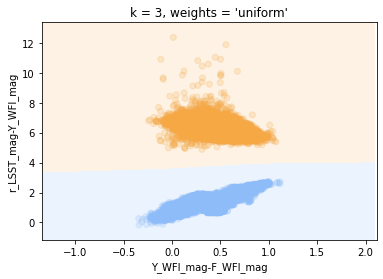

40219


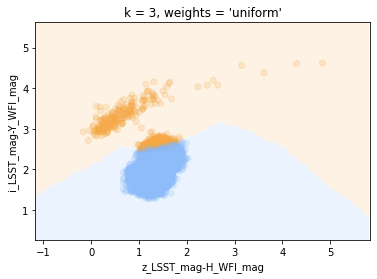

1406


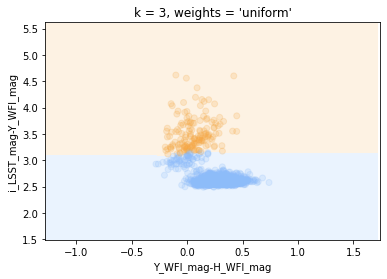

157


"\n# x: z - H\n# y: Y - J\nlabels = filter2d.predict(np.array([test_copy['z_LSST_mag']- test_copy['H_WFI_mag'], test_copy['Y_WFI_mag']- test_copy['J_WFI_mag']]).transpose())\n\nget_color_filter(filter2d, 3, 'uniform', test_copy['z_LSST_mag'], test_copy['H_WFI_mag'], test_copy['Y_WFI_mag'], test_copy['J_WFI_mag'], labels)\nplt.xlabel('z_LSST_mag-H_WFI_mag')\nplt.ylabel('Y_WFI_mag-J_WFI_mag')\nplt.show()\n\ntest_copy['label'] = labels\ntest_copy = test_copy[test_copy['label'] == 1]\nprint(len(test_copy))\n\n\n# x: i - z\n# y: i - Y\nlabels = filter2e.predict(np.array([test_copy['i_LSST_mag']-test_copy['z_LSST_mag'], test_copy['i_LSST_mag']-test_copy['Y_WFI_mag']]).transpose())\n\nget_color_filter(filter2e, 3, 'uniform', test_copy['i_LSST_mag'], test_copy['z_LSST_mag'], test_copy['i_LSST_mag'], test_copy['Y_WFI_mag'], labels)\nplt.xlabel('i_LSST_mag-z_LSST_mag')\nplt.ylabel('i_LSST_mag-Y_WFI_mag')\nplt.show()\n\ntest_copy['label'] = labels\ntest_copy = test_copy[test_copy['label'] == 1]\n

In [61]:
# x: Y - F
# y: r - Y

labels = filter2a.predict(np.array([test_copy['Y_WFI_mag']-test_copy['F_WFI_mag'], test_copy['r_LSST_mag']-test_copy['Y_WFI_mag']]).transpose())

get_color_filter(filter2a, 3, 'uniform', test_copy['Y_WFI_mag'], test_copy['F_WFI_mag'], test_copy['r_LSST_mag'], test_copy['Y_WFI_mag'], labels)
plt.xlabel('Y_WFI_mag-F_WFI_mag')
plt.ylabel('r_LSST_mag-Y_WFI_mag')
plt.show()

test_copy['label'] = labels
test_copy = test_copy[test_copy['label'] == 1]
print(len(test_copy))

# x: z - H
# y: i - Y

labels = filter2b.predict(np.array([test_copy['z_LSST_mag']-test_copy['H_WFI_mag'], test_copy['i_LSST_mag']-test_copy['Y_WFI_mag']]).transpose())

get_color_filter(filter2b, 3, 'uniform', test_copy['z_LSST_mag'], test_copy['H_WFI_mag'], test_copy['i_LSST_mag'], test_copy['Y_WFI_mag'], labels)
plt.xlabel('z_LSST_mag-H_WFI_mag')
plt.ylabel('i_LSST_mag-Y_WFI_mag')
plt.show()

test_copy['label'] = labels
test_copy = test_copy[test_copy['label'] == 1]
print(len(test_copy))

# x: Y - H
# y: i - Y
labels = filter2c.predict(np.array([test_copy['Y_WFI_mag']-test_copy['H_WFI_mag'], test_copy['i_LSST_mag']-test_copy['Y_WFI_mag']]).transpose())

get_color_filter(filter2c, 3, 'uniform', test_copy['Y_WFI_mag'], test_copy['H_WFI_mag'], test_copy['i_LSST_mag'], test_copy['Y_WFI_mag'], labels)
plt.xlabel('Y_WFI_mag-H_WFI_mag')
plt.ylabel('i_LSST_mag-Y_WFI_mag')
plt.show()

test_copy['label'] = labels
test_copy = test_copy[test_copy['label'] == 1]
print(len(test_copy))
'''
# x: z - H
# y: Y - J
labels = filter2d.predict(np.array([test_copy['z_LSST_mag']- test_copy['H_WFI_mag'], test_copy['Y_WFI_mag']- test_copy['J_WFI_mag']]).transpose())

get_color_filter(filter2d, 3, 'uniform', test_copy['z_LSST_mag'], test_copy['H_WFI_mag'], test_copy['Y_WFI_mag'], test_copy['J_WFI_mag'], labels)
plt.xlabel('z_LSST_mag-H_WFI_mag')
plt.ylabel('Y_WFI_mag-J_WFI_mag')
plt.show()

test_copy['label'] = labels
test_copy = test_copy[test_copy['label'] == 1]
print(len(test_copy))


# x: i - z
# y: i - Y
labels = filter2e.predict(np.array([test_copy['i_LSST_mag']-test_copy['z_LSST_mag'], test_copy['i_LSST_mag']-test_copy['Y_WFI_mag']]).transpose())

get_color_filter(filter2e, 3, 'uniform', test_copy['i_LSST_mag'], test_copy['z_LSST_mag'], test_copy['i_LSST_mag'], test_copy['Y_WFI_mag'], labels)
plt.xlabel('i_LSST_mag-z_LSST_mag')
plt.ylabel('i_LSST_mag-Y_WFI_mag')
plt.show()

test_copy['label'] = labels
test_copy = test_copy[test_copy['label'] == 1]
print(len(test_copy))

# x: z - H
# y: i - z
labels = filter2f.predict(np.array([test_copy['z_LSST_mag']-test_copy['H_WFI_mag'], test_copy['i_LSST_mag']-test_copy['z_LSST_mag']]).transpose())

get_color_filter(filter2f, 3, 'uniform', test_copy['z_LSST_mag'], test_copy['H_WFI_mag'], test_copy['i_LSST_mag'], test_copy['z_LSST_mag'], labels)
plt.xlabel('z_LSST_mag-H_WFI_mag')
plt.ylabel('i_LSST_mag-z_LSST_mag')
plt.show()

test_copy['label'] = labels
test_copy = test_copy[test_copy['label'] == 1]
print(len(test_copy))
'''

In [62]:
tp = test_copy.merge(qso_test_25)
# qso_test_25 - tp = omitted positives = false negatives
fn = pd.merge(tp, qso_test_25, on=['r_LSST_mag', 'i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag'], how='outer', indicator=True).query("_merge != 'both'").drop('_merge', axis=1).reset_index(drop=True)

In [63]:
tp.describe()

r_LSST_mag  i_LSST_mag  z_LSST_mag   Y_WFI_mag   J_WFI_mag   H_WFI_mag  \
count  157.000000  157.000000  157.000000  157.000000  157.000000  157.000000   
mean    27.785798   24.375279   21.674939   20.863923   20.812229   20.801379   
std      1.280895    0.568574    0.712965    0.631796    0.661295    0.679692   
min     25.089139   22.489987   19.508132   18.855353   18.835941   18.892170   
25%     27.196118   24.069056   21.391255   20.501376   20.410751   20.430828   
50%     27.633166   24.537966   21.781953   21.010666   20.936520   20.925471   
75%     28.234311   24.800334   22.001698   21.369647   21.320989   21.292062   
max     33.410321   24.987774   25.104718   21.787625   21.854093   21.938072   

        F_WFI_mag  label           z  
count  157.000000  157.0  157.000000  
mean    20.618384    1.0    6.244168  
std      0.687097    0.0    0.132777  
min     18.608676    1.0    6.013683  
25%     20.247374    1.0    6.148073  
50%     20.727760    1.0    6.215882  
75%     21.100078    1.0    6.308791  
max     21.815866    1.0    6.755535

In [64]:
fn = fn.rename(columns={'z_y': 'z'})
fn = fn[['r_LSST_mag', 'i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag', 'z']]
fn.describe()

r_LSST_mag  i_LSST_mag  z_LSST_mag  Y_WFI_mag  J_WFI_mag  H_WFI_mag  \
count   67.000000   67.000000   67.000000  67.000000  67.000000  67.000000   
mean    26.665525   24.182279   21.486351  21.178130  21.211722  21.208224   
std      0.850452    0.748765    0.735706   0.743053   0.768339   0.780888   
min     24.434817   22.315978   19.649024  19.322046  19.265916  19.191516   
25%     26.300808   23.792201   21.168328  20.884931  20.911348  20.876438   
50%     26.791581   24.442997   21.710547  21.421461  21.434358  21.363289   
75%     27.192103   24.713069   21.990755  21.707855  21.750073  21.756451   
max     28.184718   24.977877   22.399521  22.208307  22.364212  22.413041   

       F_WFI_mag          z  
count  67.000000  67.000000  
mean   21.004157   6.057431  
std     0.779357   0.047516  
min    18.990067   6.001748  
25%    20.634527   6.020929  
50%    21.152435   6.040640  
75%    21.553439   6.072171  
max    22.243509   6.184876

### Test - 22 < i < 25.5

In [36]:
qso_test = pd.read_csv('quasar_test_catalog.csv', index_col=False)
qso_test = qso_test[['z','r_LSST_mag', 'i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag']]
qso_test = qso_test.replace(99.99, np.nan).dropna()
qso_test.describe()

z   r_LSST_mag   i_LSST_mag   z_LSST_mag    Y_WFI_mag  \
count  5540.000000  5540.000000  5540.000000  5540.000000  5540.000000   
mean      6.304751    29.788654    28.141333    25.946532    25.113679   
std       0.289486     1.325108     1.727730     2.203980     2.208496   
min       6.000077    23.737275    21.400500    18.803401    18.181244   
25%       6.094965    29.002694    27.055735    24.249919    23.451190   
50%       6.222428    29.640429    28.269932    26.080465    25.060542   
75%       6.422711    30.431686    29.143613    27.555345    26.788290   
max       8.482816    38.149953    35.495708    36.798806    35.672331   

         J_WFI_mag    H_WFI_mag    F_WFI_mag  
count  5540.000000  5540.000000  5540.000000  
mean     25.090500    25.119312    24.908990  
std       2.224448     2.228957     2.202205  
min      18.048911    17.986569    17.740505  
25%      23.416544    23.445880    23.249794  
50%      25.026461    25.049666    24.870995  
75%      26.772365    26.798924    26.584627  
max      33.879891    34.514265    34.228085

In [37]:
galaxies_patch8788_partial = read_data_partial('galaxies_train_catalog_patch8788.csv', 'galaxies_patch8788_245.csv', 30000)
galaxies_patch8788_partial = galaxies_patch8788_partial.replace(99.99, np.nan).dropna()
galaxies_patch8788_partial = galaxies_patch8788_partial[['z', 'r_LSST_mag', 'i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag']]
print('galaxies_train_catalog_patch8788.csv partial data description: ')
galaxies_patch8788_partial.describe()

galaxies_train_catalog_patch8788.csv partial data description: 


z    r_LSST_mag    i_LSST_mag    z_LSST_mag     Y_WFI_mag  \
count  20750.000000  20750.000000  20750.000000  20750.000000  20750.000000   
mean       1.032609     25.634571     25.064565     24.472561     24.263562   
std        0.014266      1.321680      1.258280      1.250795      1.294158   
min        1.005989     20.964661     20.738443     20.199310     19.730171   
25%        1.020363     24.856448     24.321473     23.749411     23.524088   
50%        1.033982     25.801020     25.208614     24.607205     24.439207   
75%        1.045150     26.523427     25.930392     25.342387     25.182842   
max        1.055212     33.438068     32.004925     31.083271     28.285061   

          J_WFI_mag     H_WFI_mag     F_WFI_mag  
count  20750.000000  20750.000000  20750.000000  
mean      24.133942     24.032490     23.970953  
std        1.348217      1.403003      1.451221  
min       19.315425     18.971169     18.750817  
25%       23.357096     23.211484     23.120767  
50%       24.332423     24.249539     24.205313  
75%       25.094375     25.045359     25.005333  
max       28.161714     30.885336     32.729688

In [38]:
mlt_test = read_data_partial('mlt_test_catalog_max26.csv', 'mlt_test_catalog_255.csv', 100000)
mlt_test = mlt_test.sample(frac=0.4, replace=False, random_state=42)
mlt_test = mlt_test[['r_LSST_mag', 'i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag']]
mlt_test = mlt_test.replace(99.99, np.nan).dropna()
mlt_test['z'] = np.zeros(mlt_test.shape[0])
print('mlt_test_catalog partial data description: ')
mlt_test.describe()

mlt_test_catalog partial data description: 


r_LSST_mag    i_LSST_mag    z_LSST_mag     Y_WFI_mag     J_WFI_mag  \
count  39995.000000  39995.000000  39995.000000  39995.000000  39995.000000   
mean      26.997202     22.847905     21.668471     20.765261     20.444840   
std        0.601555      0.590803      0.527936      0.510114      0.507987   
min       25.271725     22.000020     20.269298     19.136802     18.942683   
25%       26.666033     22.325603     21.242883     20.384266     20.076415   
50%       27.026416     22.752097     21.613354     20.729046     20.414105   
75%       27.367609     23.330051     22.078231     21.149319     20.825999   
max       32.858471     24.518611     23.541767     22.762333     22.458010   

          H_WFI_mag     F_WFI_mag        z  
count  39995.000000  39995.000000  39995.0  
mean      20.314135     20.314627      0.0  
std        0.508961      0.507175      0.0  
min       18.783449     18.733884      0.0  
25%       19.944635     19.970917      0.0  
50%       20.284399     20.298322      0.0  
75%       20.695270     20.687611      0.0  
max       22.288556     22.504555      0.0

In [39]:
qso_test_copy = qso_test.copy()
qso_test_copy['label'] = np.ones(len(qso_test_copy))
galaxies_patch8788_pcopy = galaxies_patch8788_partial.copy()
galaxies_patch8788_pcopy['label'] = np.zeros(len(galaxies_patch8788_pcopy))
test_wgal = pd.concat([qso_test_copy, galaxies_patch8788_pcopy], ignore_index=True)
test_wgal.describe()

z    r_LSST_mag    i_LSST_mag    z_LSST_mag     Y_WFI_mag  \
count  26290.000000  26290.000000  26290.000000  26290.000000  26290.000000   
mean       2.143589     26.509946     25.712921     24.783166     24.442704   
std        2.154289      2.149161      1.858251      1.618524      1.571548   
min        1.005989     20.964661     20.738443     18.803401     18.181244   
25%        1.023576     25.139352     24.588200     23.813496     23.507708   
50%        1.039947     26.182220     25.549185     24.752150     24.508003   
75%        1.053059     27.463581     26.545962     25.634115     25.371764   
max        8.482816     38.149953     35.495708     36.798806     35.672331   

          J_WFI_mag     H_WFI_mag     F_WFI_mag         label  
count  26290.000000  26290.000000  26290.000000  26290.000000  
mean      24.335514     24.261512     24.168623      0.210727  
std        1.621540      1.672381      1.682379      0.407832  
min       18.048911     17.986569     17.740505      0.000000  
25%       23.364608     23.258437     23.148483      0.000000  
50%       24.406647     24.346107     24.283931      0.000000  
75%       25.295252     25.250710     25.206992      0.000000  
max       33.879891     34.514265     34.228085      1.000000

In [40]:
mlt_test_copy = mlt_test.copy()
mlt_test_copy['label'] = np.zeros(len(mlt_test_copy))
test0 = pd.concat([qso_test_copy, galaxies_patch8788_pcopy, mlt_test_copy], ignore_index=True)
test = test0[['r_LSST_mag', 'i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag', 'label']]
test.describe()

r_LSST_mag    i_LSST_mag    z_LSST_mag     Y_WFI_mag     J_WFI_mag  \
count  66285.000000  66285.000000  66285.000000  66285.000000  66285.000000   
mean      26.803946     23.984230     22.903823     22.223811     21.987962   
std        1.451573      1.882692      1.878517      2.091162      2.195714   
min       20.964661     20.738443     18.803401     18.181244     18.048911   
25%       26.127461     22.553157     21.463744     20.599774     20.290025   
50%       26.886467     23.385994     22.173454     21.283549     20.958189   
75%       27.376274     25.074778     24.313794     24.039894     23.925974   
max       38.149953     35.495708     36.798806     35.672331     33.879891   

          H_WFI_mag     F_WFI_mag         label  
count  66285.000000  66285.000000  66285.000000  
mean      21.879746     21.843201      0.083578  
std        2.234847      2.198273      0.276757  
min       17.986569     17.740505      0.000000  
25%       20.160599     20.178190      0.000000  
50%       20.826658     20.802575      0.000000  
75%       23.837123     23.760279      0.000000  
max       34.514265     34.228085      1.000000

In [41]:
qso_test_255 = qso_test[qso_test['i_LSST_mag'] < 25.5]
qso_test_255 = qso_test_255[qso_test_255['i_LSST_mag'] > 22.0]
qso_test_255_copy = qso_test_255.copy()
print(len(qso_test_255))

380


with galaxies added

In [42]:
test_wgal_copy = test_wgal.copy()
test_wgal_copy = test_wgal_copy.drop(columns=['label'])
test_wgal_copy = test_wgal_copy[test_wgal_copy['i_LSST_mag'] > 22.0]
test_wgal_copy = test_wgal_copy[test_wgal_copy['i_LSST_mag'] < 25.5]
print(len(test_wgal_copy))

12481


In [52]:
# x: Y - H
# y: r - z

features3a = [X_drop_255['Y_WFI_mag']-X_drop_255['H_WFI_mag'], X_drop_255['r_LSST_mag']-X_drop_255['z_LSST_mag']]
X3a = np.array(features3a).transpose()
filter3a.fit(X3a, Y_drop_255)
labels = filter3a.predict(np.array([test_wgal_copy['Y_WFI_mag']-test_wgal_copy['H_WFI_mag'], test_wgal_copy['r_LSST_mag']-test_wgal_copy['z_LSST_mag']]).transpose())

test_wgal_copy['label'] = labels
test_wgal_copy = test_wgal_copy[test_wgal_copy['label'] == 1]
print(len(test_wgal_copy))

# x: z - H
# y: i - z
features3b = [X_drop_255['z_LSST_mag']-X_drop_255['H_WFI_mag'], X_drop_255['i_LSST_mag']-X_drop_255['z_LSST_mag']]
X3b = np.array(features3b).transpose()
filter3b.fit(X3b, Y_drop_255)
labels = filter3b.predict(np.array([test_wgal_copy['z_LSST_mag']-test_wgal_copy['H_WFI_mag'], test_wgal_copy['i_LSST_mag']-test_wgal_copy['z_LSST_mag']]).transpose())

test_wgal_copy['label'] = labels
test_wgal_copy = test_wgal_copy[test_wgal_copy['label'] == 1]
print(len(test_wgal_copy))

# x: r - z
# y: i - Y
features3c = [X_drop_255['r_LSST_mag']-X_drop_255['z_LSST_mag'], X_drop_255['i_LSST_mag']-X_drop_255['Y_WFI_mag']]
X3c = np.array(features3c).transpose()
filter3c.fit(X3c, Y_drop_255)
labels = filter3c.predict(np.array([test_wgal_copy['r_LSST_mag']-test_wgal_copy['z_LSST_mag'], test_wgal_copy['i_LSST_mag']-test_wgal_copy['Y_WFI_mag']]).transpose())

test_wgal_copy['label'] = labels
test_wgal_copy = test_wgal_copy[test_wgal_copy['label'] == 1]
print(len(test_wgal_copy))

224
224
224


In [53]:
print(set(qso_test_255).issubset(set(test_wgal_copy)))

True


with galaxies and brown dwarfs

In [45]:
test_copy = test.copy()
test_copy = test_copy[test_copy['i_LSST_mag'] > 22.0]
test_copy = test_copy[test_copy['i_LSST_mag'] < 25.5]
print(len(test_copy))
print(len(test_copy[test_copy['label'] == 1]))

52476
380


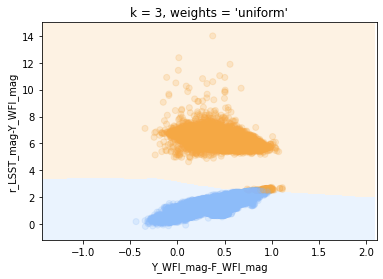

40533


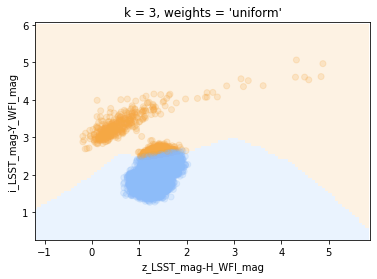

1567


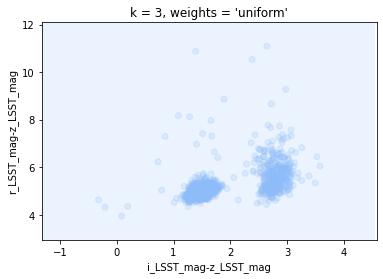

1567


In [58]:
print(set(qso_test_25).issubset(set(test_copy)))

True
